In [1]:
# import pandas as pd
# import matplotlib.pyplot as plt
# 
# df_ca = pd.read_csv(
#     'calendar.csv.gz', 
#     compression='gzip', 
#     usecols=['listing_id', 'date', 'available', 'price', 'minimum_nights']r
# )
# df_ca = df_ca[df_ca['date'] > '2025-06-01']
# df_ca.to_csv('calendario_limpo.csv', index=False)

In [2]:
# import pandas as pd
# df_li = pd.read_csv(
#     "listings_buenos.csv", 
#     usecols=['id', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_since', 'host_location',
#     'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood', 'neighbourhood_cleansed',
#     'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
#     'price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
# )
# df_li_sample = df_li.sample(frac=0.25)
# df_li_sample.to_csv('listings_limpo.csv', index=False)

In [3]:
# import pandas as pd
# df_m = pd.merge(
#     pd.read_csv('listings_limpo.csv'), 
#     pd.read_csv('calendario_limpo.csv'), 
#     left_on="id", right_on="listing_id"
# )

In [4]:
# df_m = df_m.drop('minimum_nights_y', axis=1)
# df_m = df_m.rename(columns={'price_y':'night_price', 'price_x':'buy_price'})
# df_m['night_price'] = df_m['night_price'].str.replace('$','').str.replace(',','.')
# df_m['buy_price'] = df_m['buy_price'].str.replace('$','').str.replace(',','.')

In [5]:
# df_m.to_csv('merged_buenos_aires_25.csv',index=False)

essas funções acima serviram para limpar os data frames e retirar apenas uma amostra de 25% dos dados, para possibilitar o trabalho.

#  Estatísticas descritivas e distribuições

### Calcule e interprete as medidas de tendência central \(média, mediana, moda\) e dispersão \(desvio padrão, variância, quartis\) para as variáveis price, minimum\_nights, number\_of\_reviews e availability\_365\.

In [1]:
import pandas as pd

df_m = pd.read_csv('merged_buenos_aires_25.csv')
df_m

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,...,buy_price,minimum_nights_x,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,listing_id,date,available,night_price
0,1232034785234076128,soldado house,suitable for couple or single ，no smoking in t...,NaN,232206074,2018-12-24,"Buenos Aires, Argentina",100%,50%,f,...,63.013.00,7,363,0,NaN,NaN,1232034785234076128,2025-06-02,t,60.00
1,1232034785234076128,soldado house,suitable for couple or single ，no smoking in t...,NaN,232206074,2018-12-24,"Buenos Aires, Argentina",100%,50%,f,...,63.013.00,7,363,0,NaN,NaN,1232034785234076128,2025-06-03,t,60.00
2,1232034785234076128,soldado house,suitable for couple or single ，no smoking in t...,NaN,232206074,2018-12-24,"Buenos Aires, Argentina",100%,50%,f,...,63.013.00,7,363,0,NaN,NaN,1232034785234076128,2025-06-04,t,60.00
3,1232034785234076128,soldado house,suitable for couple or single ，no smoking in t...,NaN,232206074,2018-12-24,"Buenos Aires, Argentina",100%,50%,f,...,63.013.00,7,363,0,NaN,NaN,1232034785234076128,2025-06-05,t,60.00
4,1232034785234076128,soldado house,suitable for couple or single ，no smoking in t...,NaN,232206074,2018-12-24,"Buenos Aires, Argentina",100%,50%,f,...,63.013.00,7,363,0,NaN,NaN,1232034785234076128,2025-06-06,t,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125950,1217329738928901339,"""303 O Tu Hogar Temporal"" Depto Cómodo y Céntr...","Divisible apartment with sliding door, capacit...",Building in the heart of Belgrano.<br /><br />...,450280697,2022-03-19,NaN,100%,99%,t,...,69.167.00,1,277,5,4.8,0.9,1217329738928901339,2026-01-25,f,68.00
2125951,1217329738928901339,"""303 O Tu Hogar Temporal"" Depto Cómodo y Céntr...","Divisible apartment with sliding door, capacit...",Building in the heart of Belgrano.<br /><br />...,450280697,2022-03-19,NaN,100%,99%,t,...,69.167.00,1,277,5,4.8,0.9,1217329738928901339,2026-01-26,f,68.00
2125952,1217329738928901339,"""303 O Tu Hogar Temporal"" Depto Cómodo y Céntr...","Divisible apartment with sliding door, capacit...",Building in the heart of Belgrano.<br /><br />...,450280697,2022-03-19,NaN,100%,99%,t,...,69.167.00,1,277,5,4.8,0.9,1217329738928901339,2026-01-27,f,68.00
2125953,1217329738928901339,"""303 O Tu Hogar Temporal"" Depto Cómodo y Céntr...","Divisible apartment with sliding door, capacit...",Building in the heart of Belgrano.<br /><br />...,450280697,2022-03-19,NaN,100%,99%,t,...,69.167.00,1,277,5,4.8,0.9,1217329738928901339,2026-01-28,f,68.00


In [2]:
df_m = df_m[(~df_m['buy_price'].isnull()) & (~df_m['night_price'].isnull())]
df_m['buy_price'] = pd.to_numeric(df_m['buy_price'].str.replace('.00','',regex=True).str.replace('.','',regex=False))
df_m['night_price'] = pd.to_numeric(df_m['night_price'].str.replace('.00','',regex=True).str.replace('.','',regex=False))

/tmp/ipykernel_47/1040841025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['buy_price'] = pd.to_numeric(df_m['buy_price'].str.replace('.00','',regex=True).str.replace('.','',regex=False))
/tmp/ipykernel_47/1040841025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['night_price'] = pd.to_numeric(df_m['night_price'].str.replace('.00','',regex=True).str.replace('.','',regex=False))


In [8]:
def calcula_e_mostra_metricas(series):
    print("***** TENDÊNCIAS *****")
    print("----- Média ----- ")
    print(series.mean())
    print("----- Mediana ----- ")
    print(series.median())
    print("----- Moda -----")
    print(series.mode())
    print("\n***** DISPERSÃO *****")
    print("----- desvio padrão -----")
    print(series.std())
    print("----- variância -----")
    print(series.var())
    print("----- quartis -----")
    print(f"Primeiro Quartil: {series.quantile(0.25)}")
    print(f"Segundo Quartil: {series.quantile(0.5)}")
    print(f"Terceiro Quartil: {series.quantile(0.75)}\n")

print('Métricas "buy_price"')
calcula_e_mostra_metricas(df_m.buy_price)
print('Métricas "night_price"')
calcula_e_mostra_metricas(df_m.night_price)
print('Métricas "minimum_nights"')
calcula_e_mostra_metricas(df_m.minimum_nights_x)
print('Métricas "number_of_reviews"')
calcula_e_mostra_metricas(df_m.number_of_reviews)
print('Métricas "availability_365"')
calcula_e_mostra_metricas(df_m.availability_365)

Métricas "buy_price"
***** TENDÊNCIAS *****
----- Média ----- 
116038.62456189225
----- Mediana ----- 
37661.0
----- Moda -----
0    429
Name: buy_price, dtype: int64

***** DISPERSÃO *****
----- desvio padrão -----
1898289.3916869266
----- variância -----
3603502614591.122
----- quartis -----
Primeiro Quartil: 27306.0
Segundo Quartil: 37661.0
Terceiro Quartil: 57762.0

Métricas "night_price"
***** TENDÊNCIAS *****
----- Média ----- 
494.532558677973
----- Mediana ----- 
40.0
----- Moda -----
0    30.0
Name: night_price, dtype: float64

***** DISPERSÃO *****
----- desvio padrão -----
28192.826024594426
----- variância -----
794835439.2530488
----- quartis -----
Primeiro Quartil: 30.0
Segundo Quartil: 40.0
Terceiro Quartil: 59.0

Métricas "minimum_nights"
***** TENDÊNCIAS *****
----- Média ----- 
5.349077021605722
----- Mediana ----- 
2.0
----- Moda -----
0    2
Name: minimum_nights_x, dtype: int64

***** DISPERSÃO *****
----- desvio padrão -----
21.300235413076685
----- variância -----

buy_price

Tendência Central:
Média muito maior que a mediana, indicando forte assimetria à direita
Mediana (37,661), 50% dos imóveis custam menos de 37661
Moda (429) o valor mais frequente é baixo (429) não sendo nem dentro da realidade, podendo ser considerado um erro nos dados (com esse valor, mais a média sendo muito baixa, pode-se concluir que ou a maioria dos valores estão errados, ou este valor não é o valor de compra do imóvel, vou retirar então esta coluna das análises e do dataset)

Dispersão:
Desvio padrão (1,898,289.39) valores estão extremamente dispersos
Variância (3.6 trilhões) variabilidade monstruosa
Quartis Q1=27306, Q2=37661, Q3=57762 - mostram que 50% dos dados estão entre 27k e 58k

Interpretação:
Presença de outliers extremos: Alguns imóveis com preços muito altos estão puxando a média para cima
Distribuição altamente assimétrica: A maioria dos imóveis tem preços moderados, mas há alguns valores extremamente altos
75% dos imóveis custam menos de 57762, mas a média é de 116038
Como dito antes, não vou mais utilizar essa coluna para análises, esses valores são muito altos para ser o preço de uma noite, e muito baixos para o valor de um imóvel. Pesquisando na internet, https://www.quintoandar.com.br/guias/dados-indices/mercado-residencial-america-latina/ o preço médio do m2 em buenos aires é de 13k, um apartamento de 50m2 seria de 647k, em dólares 119k, ainda muito maior que a média.

night_price

Tendência Central:
Média (494.53) significativamente maior que a mediana
Mediana (40.0) 50% das diárias custam menos de 40
Moda (30.0) o preço mais comum é 30 por noite

Dispersão:
Desvio padrão (28,192.83) muito alto
Variância (794.8 milhões) variabilidade extrema
Quartis Q1=30, Q2=40, Q3=59 - 75% das diárias custam menos de 59

Interpretação:
Outliers muito altos, algumas diárias com preços exorbitantes
A maioria dos preços é acessível: 75% das diárias custam menos de 59
Média não representativa, 494.53 não reflete a realidade da maioria dos imóveis
Mediana é melhor medida 40 representa melhor o preço típico

minimum_nights

Tendência Central:
Média (5.35) um pouco maior que a mediana
Mediana (2.0) metade dos anúncios exige 2 noites ou menos
Moda (2) o requisito mais comum é 2 noites mínimas

Dispersão:
Desvio padrão (21.30) relativamente alto considerando a escala
Variância (453.70) variabilidade moderada
Quartis Q1=1, Q2=2, Q3=3 - Distribuição concentrada

Interpretação:
Distribuição razoavelmente concentrada, 75% exigem 3 noites ou menos
Alguns outliers, algumas propriedades exigem muitas noites
Mediana é representativa, 2 noites é uma boa medida central

number_of_reviews

Tendência Central:
Média (29.41), maior que a mediana, indicando alguns imóveis muito avaliados
Mediana (12.0), 50% dos imóveis têm 12 avaliações ou menos
Moda (0), o valor mais comum é ZERO avaliações

Dispersão:
Desvio padrão (46.16) alto, mas não extremo
Variância (2,130.64) variabilidade considerável
Quartis, Q1=2, Q2=12, Q3=37, distribuição desigual

Interpretação:
Muitos imóveis sem reviews
Distribuição de Pareto, poucos imóveis concentram muitas avaliações
A maioria tem pouca atividade de avaliação
Mediana melhor que média, 12 representa melhor a maioria

availability_365

Tendência Central:
Média (226.53), próxima da mediana
Mediana (253.0), metade está disponível 253 dias ou mais
Moda (365), o valor mais comum é disponibilidade total

Dispersão:
Desvio padrão (114.62) moderado para escala de 0-365
Variância, variabilidade razoável
Quartis, Q1=124, Q2=253, Q3=338

Interpretação:
Distribuição relativamente simétrica, média e mediana próximas
Alta disponibilidade geral, mediana de 253 dias
Moda em 365, muitos imóveis disponíveis o ano todo

In [5]:
df_m = df_m.drop('buy_price', axis=1)

In [8]:
df_m.to_csv('merged_buenos_aires_25_2.csv', index=False)

### Construa histogramas, boxplots e gráficos de densidade para price e number\_of\_reviews\. Identifique outliers e discuta seu impacto sobre a média e a mediana\.

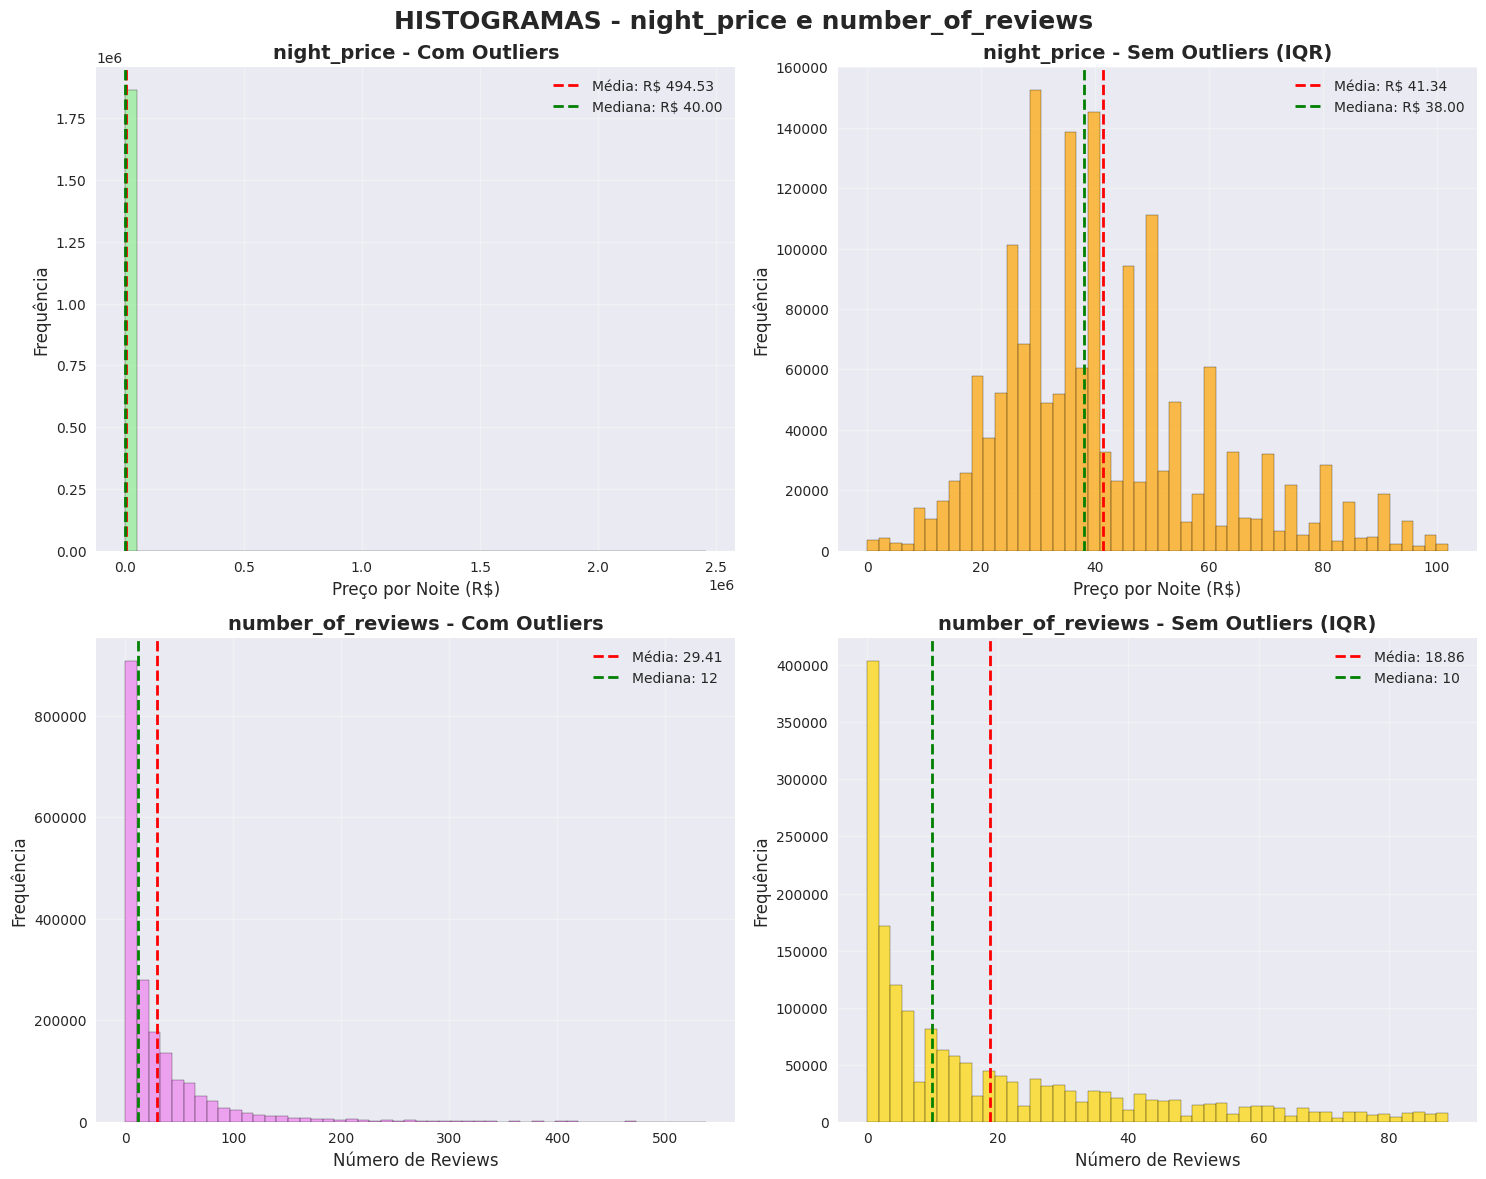

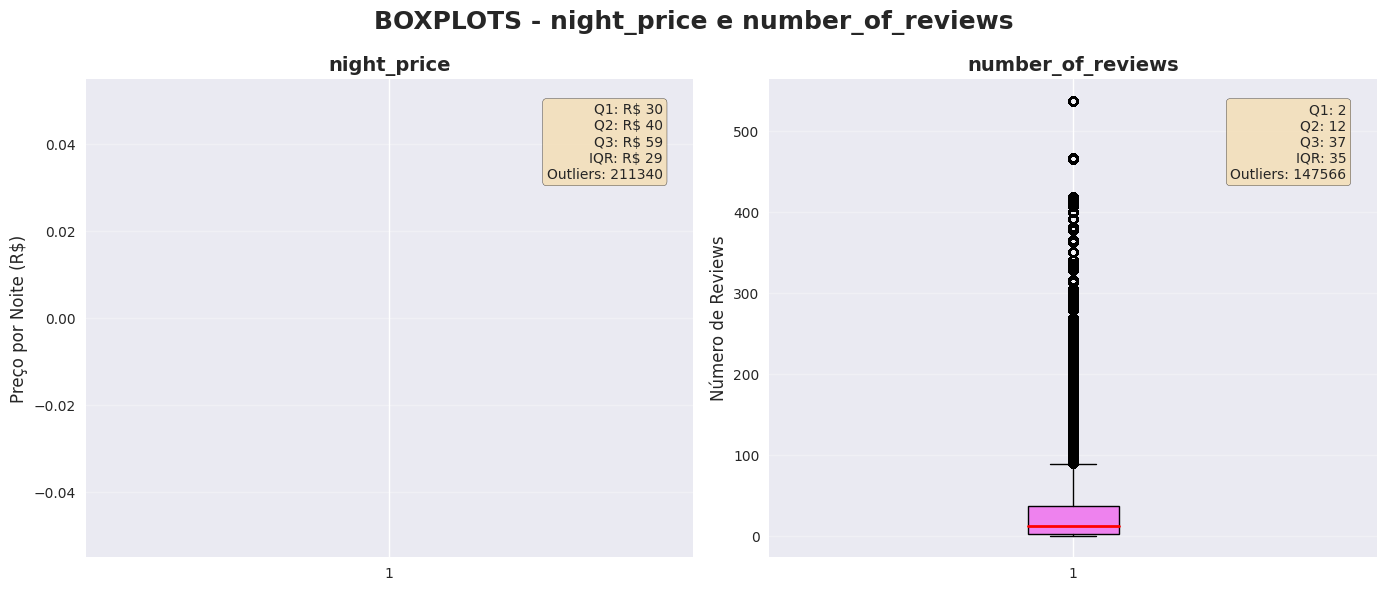

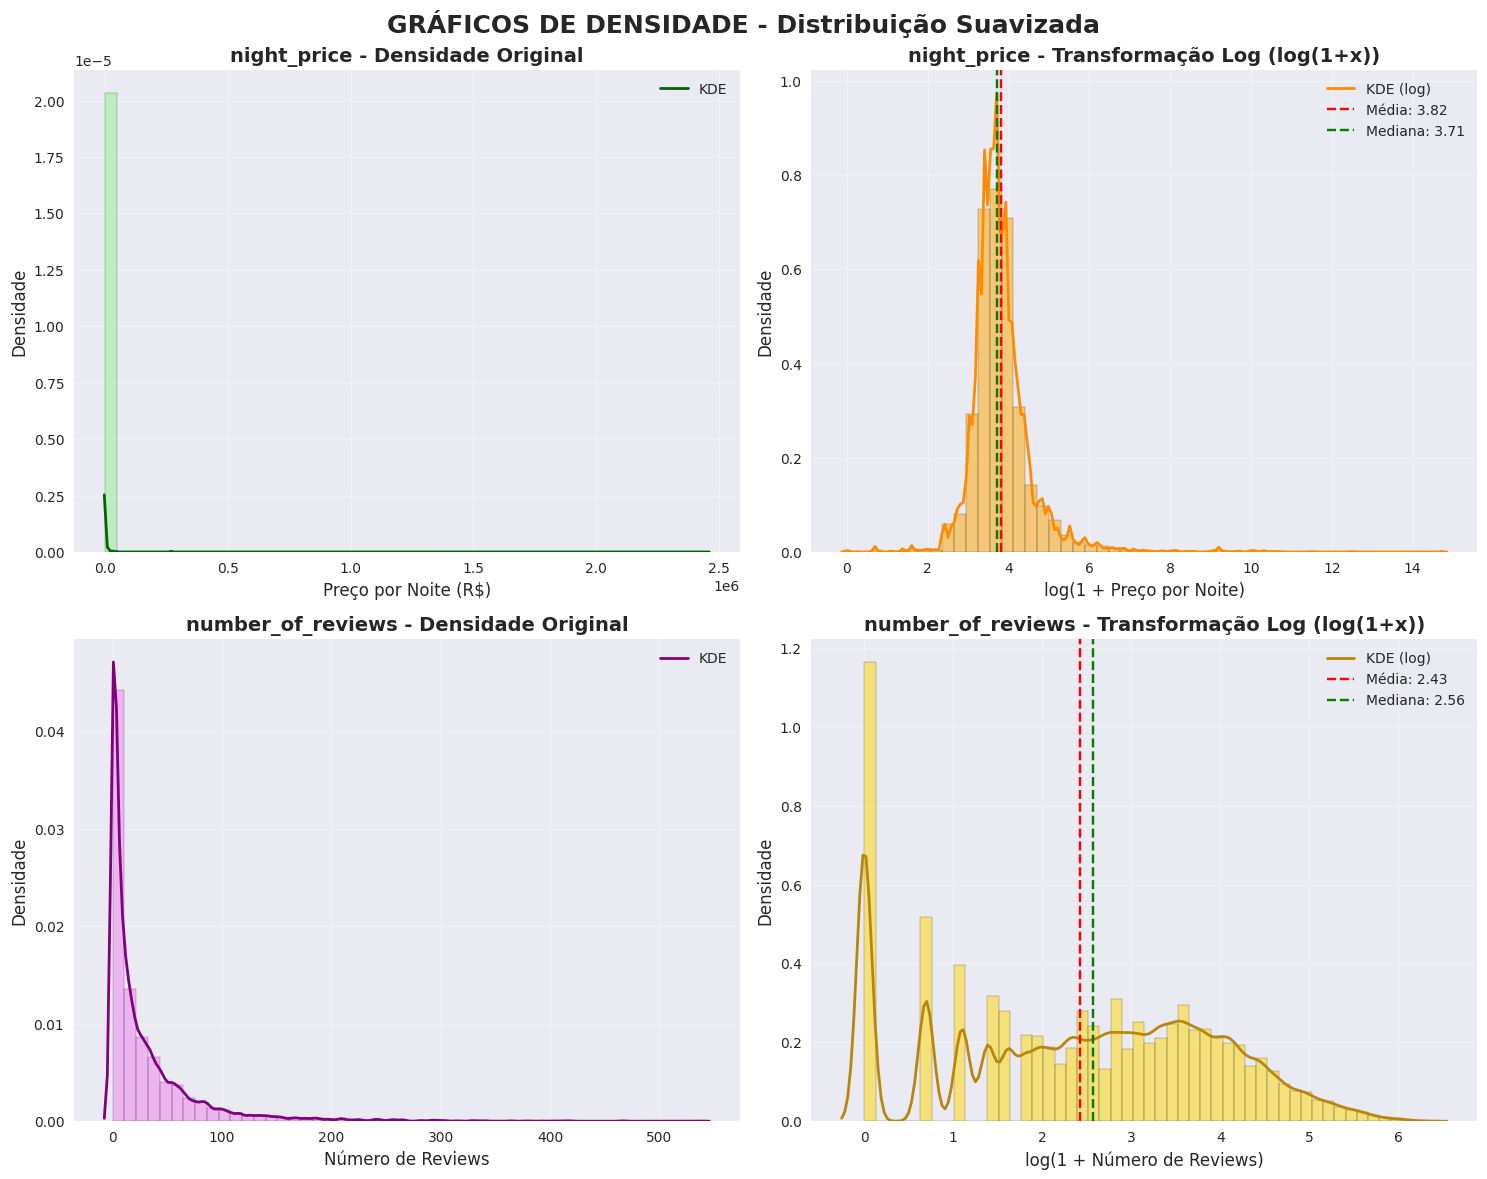

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurações estéticas
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 11

# Função para remover outliers usando IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

# Criar datasets sem outliers
df_no_outliers_night = remove_outliers_iqr(df_m, 'night_price')
df_no_outliers_reviews = remove_outliers_iqr(df_m, 'number_of_reviews')

# 1. HISTOGRAMAS COMPARATIVOS ===============================================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('HISTOGRAMAS - night_price e number_of_reviews', fontsize=18, fontweight='bold')

# 1.1 night_price (com e sem outliers)
axes[0, 0].hist(df_m['night_price'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 0].axvline(df_m['night_price'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Média: R$ {df_m["night_price"].mean():.2f}')
axes[0, 0].axvline(df_m['night_price'].median(), color='green', linestyle='--', linewidth=2, 
                    label=f'Mediana: R$ {df_m["night_price"].median():.2f}')
axes[0, 0].set_title('night_price - Com Outliers', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Preço por Noite (R$)', fontsize=12)
axes[0, 0].set_ylabel('Frequência', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(df_no_outliers_night['night_price'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0, 1].axvline(df_no_outliers_night['night_price'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Média: R$ {df_no_outliers_night["night_price"].mean():.2f}')
axes[0, 1].axvline(df_no_outliers_night['night_price'].median(), color='green', linestyle='--', linewidth=2, 
                    label=f'Mediana: R$ {df_no_outliers_night["night_price"].median():.2f}')
axes[0, 1].set_title('night_price - Sem Outliers (IQR)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Preço por Noite (R$)', fontsize=12)
axes[0, 1].set_ylabel('Frequência', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 1.2 number_of_reviews (com e sem outliers)
axes[1, 0].hist(df_m['number_of_reviews'], bins=50, alpha=0.7, color='violet', edgecolor='black')
axes[1, 0].axvline(df_m['number_of_reviews'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Média: {df_m["number_of_reviews"].mean():.2f}')
axes[1, 0].axvline(df_m['number_of_reviews'].median(), color='green', linestyle='--', linewidth=2, 
                    label=f'Mediana: {df_m["number_of_reviews"].median():.0f}')
axes[1, 0].set_title('number_of_reviews - Com Outliers', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Número de Reviews', fontsize=12)
axes[1, 0].set_ylabel('Frequência', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(df_no_outliers_reviews['number_of_reviews'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].axvline(df_no_outliers_reviews['number_of_reviews'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'Média: {df_no_outliers_reviews["number_of_reviews"].mean():.2f}')
axes[1, 1].axvline(df_no_outliers_reviews['number_of_reviews'].median(), color='green', linestyle='--', linewidth=2, 
                    label=f'Mediana: {df_no_outliers_reviews["number_of_reviews"].median():.0f}')
axes[1, 1].set_title('number_of_reviews - Sem Outliers (IQR)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Número de Reviews', fontsize=12)
axes[1, 1].set_ylabel('Frequência', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. BOXPLOTS ================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('BOXPLOTS - night_price e number_of_reviews', fontsize=18, fontweight='bold')

# Boxplot para night_price
bp1 = axes[0].boxplot(df_m['night_price'], vert=True, patch_artist=True, 
                      boxprops=dict(facecolor='lightgreen'),
                      medianprops=dict(color='red', linewidth=2))
axes[0].set_title('night_price', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Preço por Noite (R$)', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='y')

# Adicionar estatísticas
stats_text = f"""Q1: R$ {df_m['night_price'].quantile(0.25):.0f}
Q2: R$ {df_m['night_price'].median():.0f}
Q3: R$ {df_m['night_price'].quantile(0.75):.0f}
IQR: R$ {df_m['night_price'].quantile(0.75) - df_m['night_price'].quantile(0.25):.0f}
Outliers: {len(df_m) - len(df_no_outliers_night)}"""
axes[0].text(0.95, 0.95, stats_text, transform=axes[0].transAxes, 
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Boxplot para number_of_reviews
bp2 = axes[1].boxplot(df_m['number_of_reviews'], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='violet'),
                      medianprops=dict(color='red', linewidth=2))
axes[1].set_title('number_of_reviews', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Número de Reviews', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

stats_text = f"""Q1: {df_m['number_of_reviews'].quantile(0.25):.0f}
Q2: {df_m['number_of_reviews'].median():.0f}
Q3: {df_m['number_of_reviews'].quantile(0.75):.0f}
IQR: {df_m['number_of_reviews'].quantile(0.75) - df_m['number_of_reviews'].quantile(0.25):.0f}
Outliers: {len(df_m) - len(df_no_outliers_reviews)}"""
axes[1].text(0.95, 0.95, stats_text, transform=axes[1].transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# 3. GRÁFICOS DE DENSIDADE (KDE) =============================================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('GRÁFICOS DE DENSIDADE - Distribuição Suavizada', fontsize=18, fontweight='bold')

# 3.1 night_price - Original e Log Transformado
# Original
axes[0, 0].hist(df_m['night_price'], bins=50, density=True, alpha=0.5, color='lightgreen', edgecolor='black')
sns.kdeplot(data=df_m['night_price'], ax=axes[0, 0], color='darkgreen', linewidth=2, label='KDE')
axes[0, 0].set_title('night_price - Densidade Original', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Preço por Noite (R$)', fontsize=12)
axes[0, 0].set_ylabel('Densidade', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Log transformado
df_m['night_price_log'] = np.log1p(df_m['night_price'])
axes[0, 1].hist(df_m['night_price_log'], bins=50, density=True, alpha=0.5, color='orange', edgecolor='black')
sns.kdeplot(data=df_m['night_price_log'], ax=axes[0, 1], color='darkorange', linewidth=2, label='KDE (log)')
axes[0, 1].axvline(df_m['night_price_log'].mean(), color='red', linestyle='--', label=f'Média: {df_m["night_price_log"].mean():.2f}')
axes[0, 1].axvline(df_m['night_price_log'].median(), color='green', linestyle='--', label=f'Mediana: {df_m["night_price_log"].median():.2f}')
axes[0, 1].set_title('night_price - Transformação Log (log(1+x))', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('log(1 + Preço por Noite)', fontsize=12)
axes[0, 1].set_ylabel('Densidade', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3.2 number_of_reviews - Original e Log Transformado
# Original
axes[1, 0].hist(df_m['number_of_reviews'], bins=50, density=True, alpha=0.5, color='violet', edgecolor='black')
sns.kdeplot(data=df_m['number_of_reviews'], ax=axes[1, 0], color='purple', linewidth=2, label='KDE')
axes[1, 0].set_title('number_of_reviews - Densidade Original', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Número de Reviews', fontsize=12)
axes[1, 0].set_ylabel('Densidade', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Log transformado
df_m['number_of_reviews_log'] = np.log1p(df_m['number_of_reviews'])
axes[1, 1].hist(df_m['number_of_reviews_log'], bins=50, density=True, alpha=0.5, color='gold', edgecolor='black')
sns.kdeplot(data=df_m['number_of_reviews_log'], ax=axes[1, 1], color='darkgoldenrod', linewidth=2, label='KDE (log)')
axes[1, 1].axvline(df_m['number_of_reviews_log'].mean(), color='red', linestyle='--', label=f'Média: {df_m["number_of_reviews_log"].mean():.2f}')
axes[1, 1].axvline(df_m['number_of_reviews_log'].median(), color='green', linestyle='--', label=f'Mediana: {df_m["number_of_reviews_log"].median():.2f}')
axes[1, 1].set_title('number_of_reviews - Transformação Log (log(1+x))', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('log(1 + Número de Reviews)', fontsize=12)
axes[1, 1].set_ylabel('Densidade', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Os outliers nas duas variáveis, mas principalmente night price, influenciam de forma extrema na média, de 494 para 41, e impactam, mas não tanto na mediana, 40 para 38. Análises, visualizações, que visam representar a maioria dos dados dessas variáveis, devem ser feitas sem esses outliers, com certeza. 

### Analise as variáveis categóricas room\_type e neighbourhood\_cleansed, calculando proporções e gerando gráficos de barras\.

                       ANÁLISE DAS VARIÁVEIS CATEGÓRICAS                        

📊 VARIÁVEIS DISPONÍVEIS NO DATAFRAME:
['id', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_since', 'host_location', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights_x', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'listing_id', 'date', 'available', 'night_price', 'night_price_log', 'number_of_reviews_log']
Coluna encontrada para neighbourhood: neighborhood_overview
Coluna encontrada para neighbourhood: neighbourhood
Coluna encontrada para neighbourhood: neighbourhood_cleansed
Coluna encontrada para room_type: property_type
Coluna encontrada para room_type: room_type
Coluna encontrada para room_type: bathrooms
Coluna encontrada para room_type: bedrooms

Usando colunas:


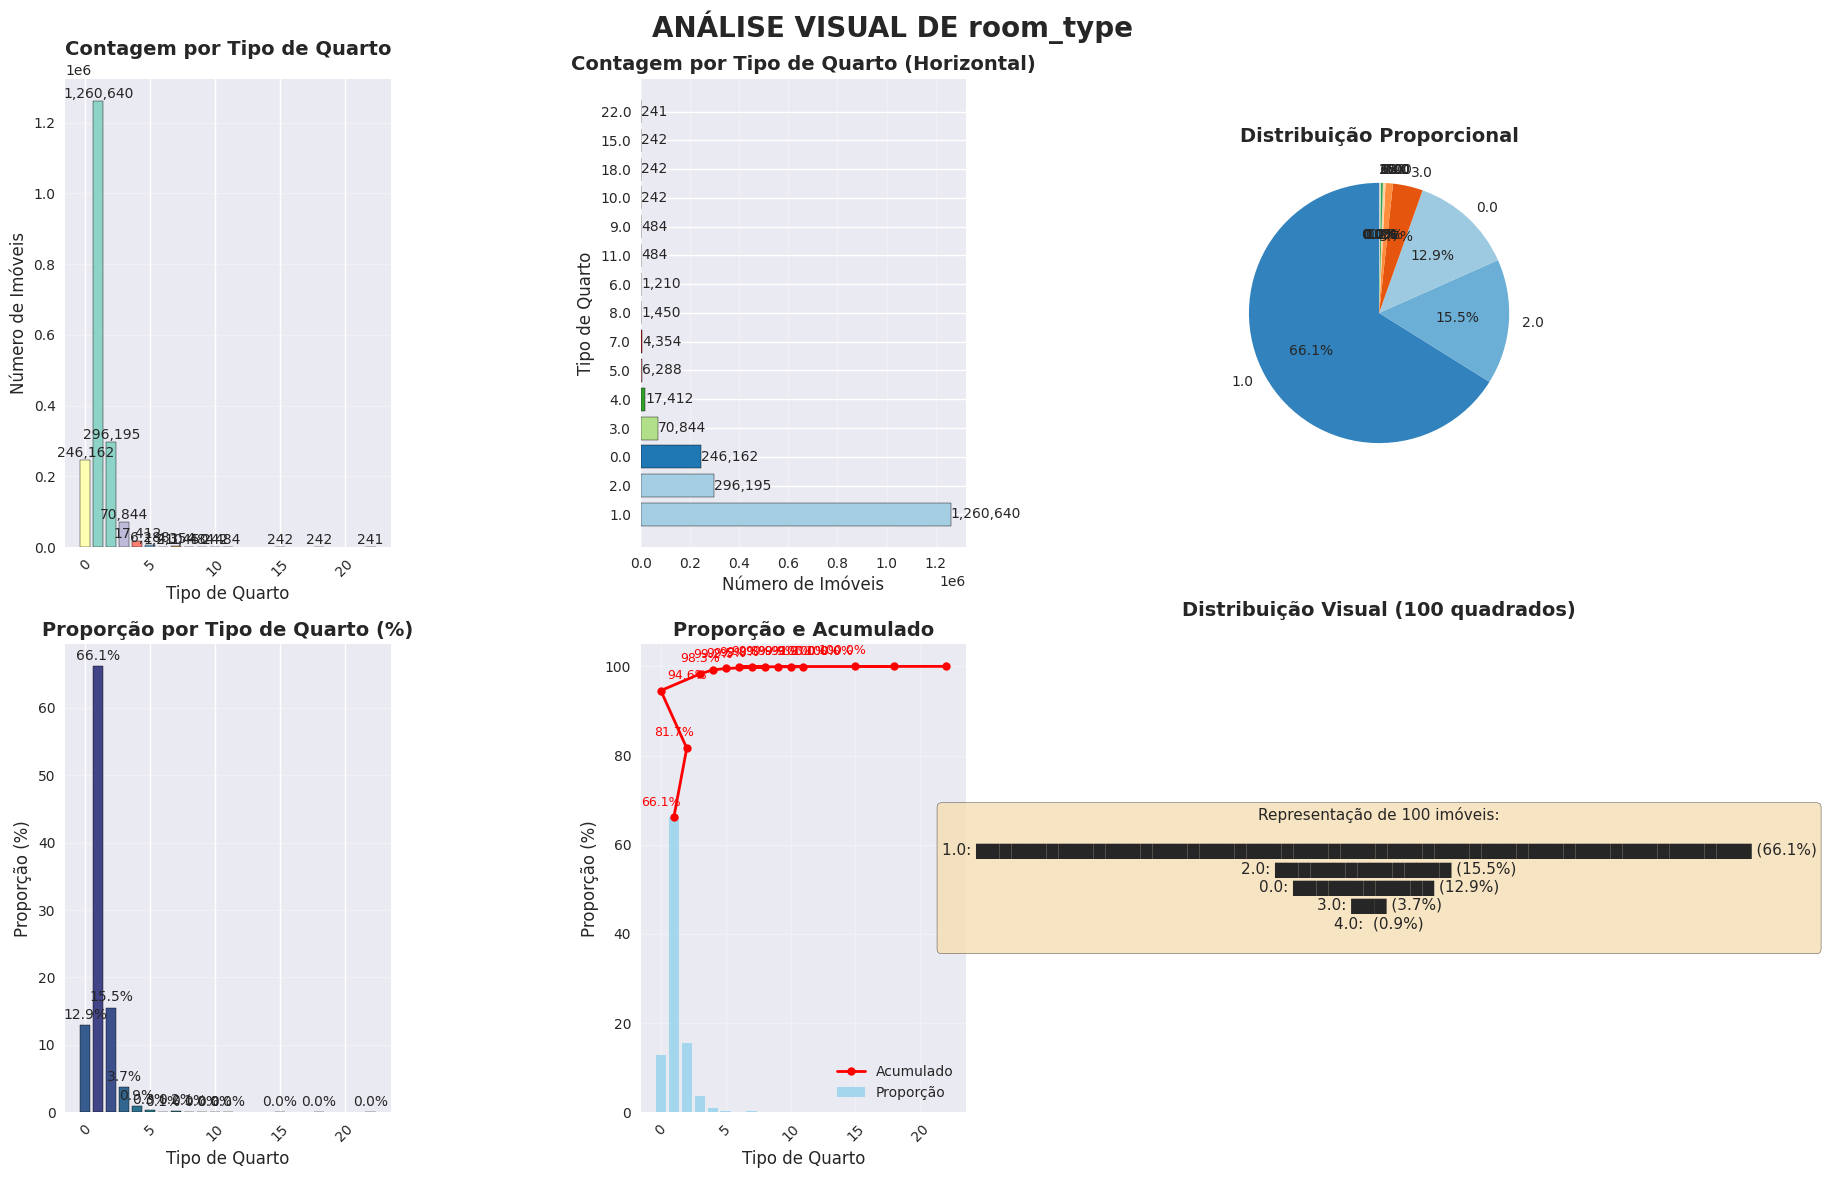

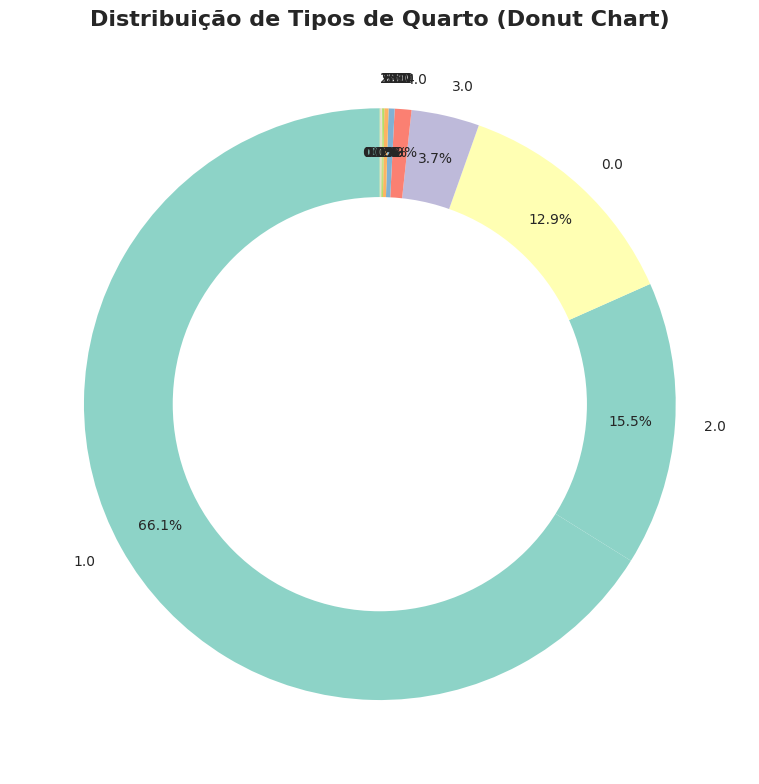


                      GRÁFICOS PARA neighbourhood_cleansed                      


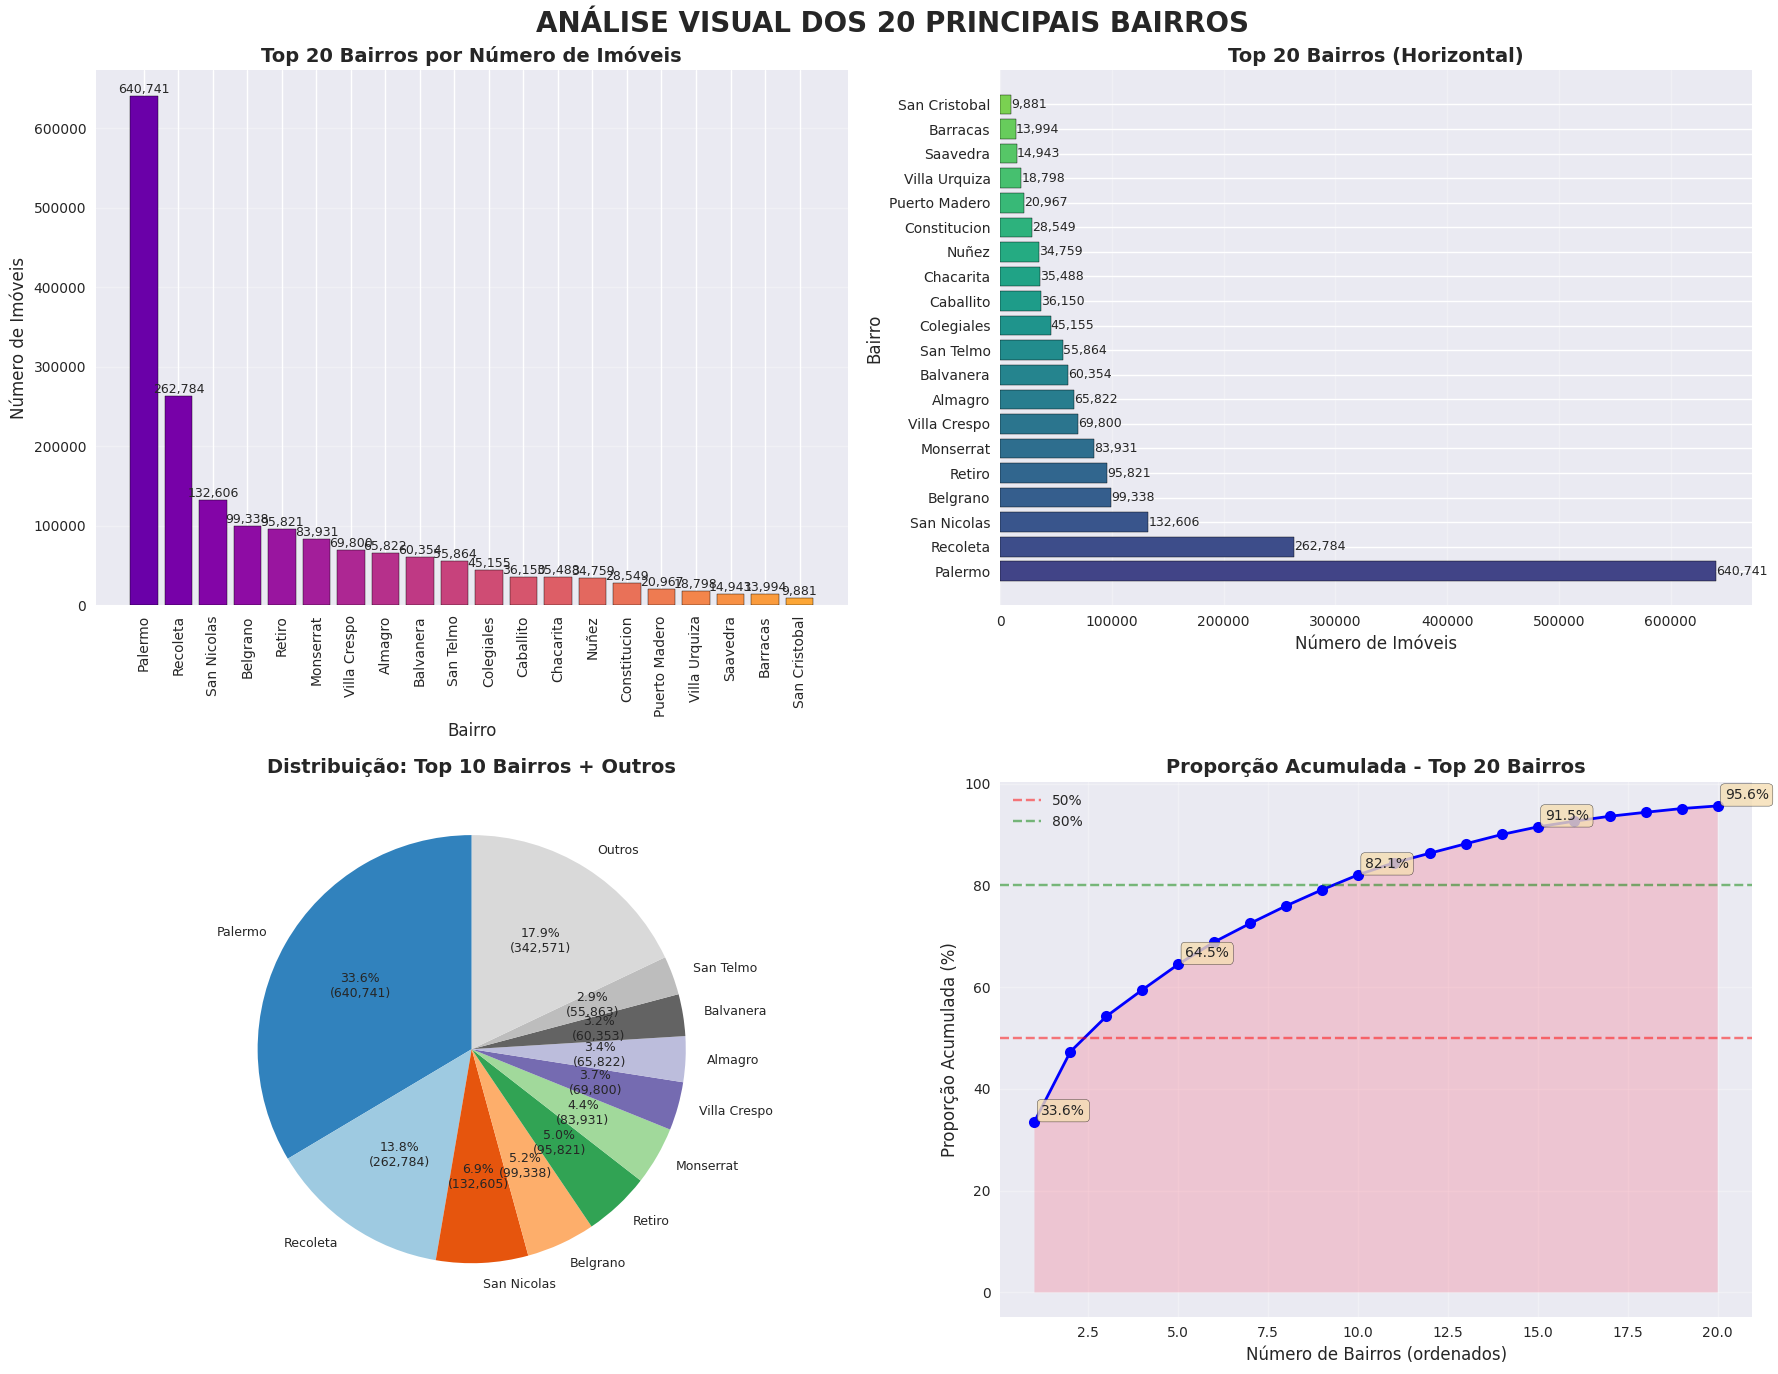

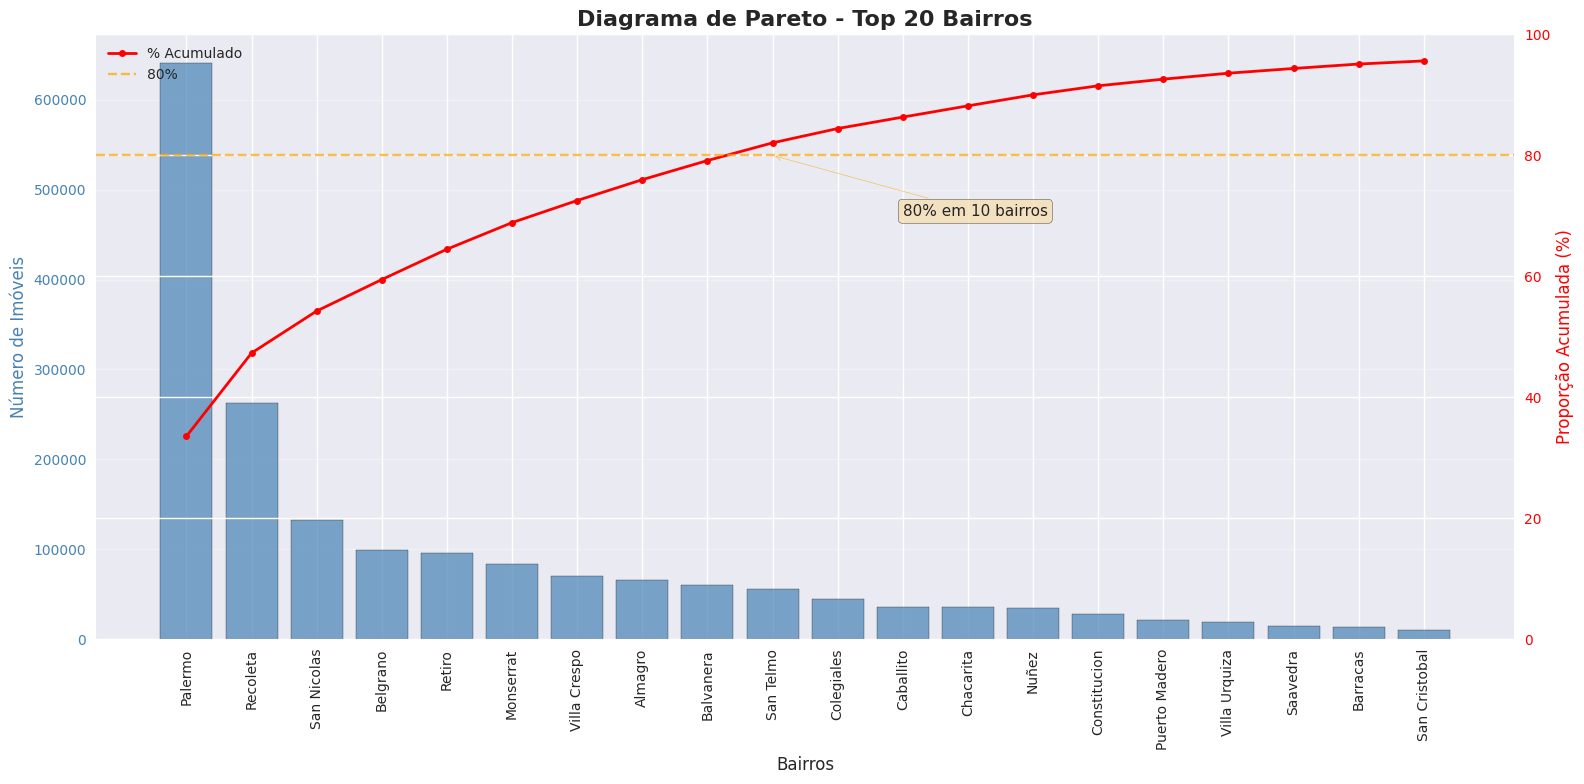

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

# Configurações estéticas
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 12

# ============================================================================
# 1. ANÁLISE INICIAL DAS VARIÁVEIS CATEGÓRICAS
# ============================================================================

print("="*80)
print("ANÁLISE DAS VARIÁVEIS CATEGÓRICAS".center(80))
print("="*80)

# Verificar se as variáveis existem no DataFrame
print("\n📊 VARIÁVEIS DISPONÍVEIS NO DATAFRAME:")
print(df_m.columns.tolist())

# Verificar os nomes exatos das colunas
colunas_disponiveis = df_m.columns.tolist()
room_type_col = None
neighbourhood_col = None

# Encontrar colunas relacionadas a room_type
for col in colunas_disponiveis:
    if 'room' in col.lower() or 'type' in col.lower():
        room_type_col = col
        print(f"Coluna encontrada para room_type: {col}")
    
    if 'neighbourhood' in col.lower() or 'bairro' in col.lower() or 'neighbor' in col.lower():
        neighbourhood_col = col
        print(f"Coluna encontrada para neighbourhood: {col}")

# Se não encontrou automaticamente, usar nomes padrão
if room_type_col is None:
    # Tentar encontrar por padrão
    possiveis = ['room_type', 'tipo_quarto', 'tipo', 'room']
    for p in possiveis:
        if p in colunas_disponiveis:
            room_type_col = p
            break

if neighbourhood_col is None:
    possiveis = ['neighbourhood_cleansed', 'neighbourhood', 'bairro', 'zona']
    for p in possiveis:
        if p in colunas_disponiveis:
            neighbourhood_col = p
            break

# Se ainda não encontrou, usar as que o usuário mencionou
if room_type_col is None:
    room_type_col = 'room_type'
    
if neighbourhood_col is None:
    neighbourhood_col = 'neighbourhood_cleansed'

print(f"\nUsando colunas:")
print(f"room_type: {room_type_col}")
print(f"neighbourhood_cleansed: {neighbourhood_col}")

# ============================================================================
# 2. ANÁLISE DE room_type
# ============================================================================

print("\n" + "="*80)
print("ANÁLISE DA VARIÁVEL: room_type".center(80))
print("="*80)

# Verificar se a coluna existe
if room_type_col in df_m.columns:
    # Estatísticas básicas
    room_type_counts = df_m[room_type_col].value_counts()
    room_type_proportions = df_m[room_type_col].value_counts(normalize=True) * 100
    
    print(f"\nTotal de categorias: {len(room_type_counts)}")
    print(f"Valores únicos: {df_m[room_type_col].nunique()}")
    print(f"Valores nulos: {df_m[room_type_col].isnull().sum()} ({df_m[room_type_col].isnull().sum()/len(df_m)*100:.2f}%)")
    
    print("\n📈 DISTRIBUIÇÃO DE room_type:")
    print("-"*50)
    
    room_stats = pd.DataFrame({
        'Contagem': room_type_counts,
        'Proporção (%)': room_type_proportions.round(2),
        'Proporção Acumulada (%)': room_type_proportions.cumsum().round(2)
    })
    
    print(room_stats)
    
    # Top categorias
    print(f"\n🏆 TOP 5 CATEGORIAS:")
    for i, (cat, count) in enumerate(room_type_counts.head().items()):
        prop = room_type_proportions.iloc[i]
        print(f"{i+1}. {cat}: {count:,} imóveis ({prop:.1f}%)")
    
    # Análise de diversidade
    print(f"\n📊 DIVERSIDADE:")
    print(f"Índice de Gini-Simpson: {1 - ((room_type_proportions/100)**2).sum():.3f}")
    print(f"Entropia de Shannon: {(-(room_type_proportions/100 * np.log2(room_type_proportions/100)).sum()):.3f} bits")
    
else:
    print(f"\n❌ Coluna '{room_type_col}' não encontrada no DataFrame!")
    print("Colunas disponíveis:", df_m.columns.tolist())

# ============================================================================
# 3. ANÁLISE DE neighbourhood_cleansed
# ============================================================================

print("\n" + "="*80)
print("ANÁLISE DA VARIÁVEL: neighbourhood_cleansed".center(80))
print("="*80)

if neighbourhood_col in df_m.columns:
    # Estatísticas básicas
    neighbourhood_counts = df_m[neighbourhood_col].value_counts()
    neighbourhood_proportions = df_m[neighbourhood_col].value_counts(normalize=True) * 100
    
    print(f"\nTotal de bairros: {len(neighbourhood_counts)}")
    print(f"Valores únicos: {df_m[neighbourhood_col].nunique()}")
    print(f"Valores nulos: {df_m[neighbourhood_col].isnull().sum()} ({df_m[neighbourhood_col].isnull().sum()/len(df_m)*100:.2f}%)")
    
    print("\n📈 DISTRIBUIÇÃO DE BAIRROS (Top 15):")
    print("-"*60)
    
    # DataFrame para top 15 bairros
    top_neighbourhoods = neighbourhood_counts.head(15)
    top_proportions = neighbourhood_proportions.head(15)
    
    neighbourhood_stats = pd.DataFrame({
        'Contagem': top_neighbourhoods,
        'Proporção (%)': top_proportions.round(2),
        'Proporção Acumulada (%)': top_proportions.cumsum().round(2)
    })
    
    print(neighbourhood_stats)
    
    # Análise de concentração
    print(f"\n🏙️ CONCENTRAÇÃO GEOGRÁFICA:")
    print(f"Top 5 bairros concentram: {neighbourhood_proportions.head(5).sum():.1f}% dos imóveis")
    print(f"Top 10 bairros concentram: {neighbourhood_proportions.head(10).sum():.1f}% dos imóveis")
    print(f"Top 20 bairros concentram: {neighbourhood_proportions.head(20).sum():.1f}% dos imóveis")
    
    # Bairros com poucos imóveis
    bairros_poucos_imoveis = neighbourhood_counts[neighbourhood_counts <= 5]
    print(f"\n⚠️ Bairros com 5 ou menos imóveis: {len(bairros_poucos_imoveis)}")
    
    if len(bairros_poucos_imoveis) > 0:
        print("Exemplos:", list(bairros_poucos_imoveis.index[:10]))
    
    # Diversidade
    print(f"\n📊 DIVERSIDADE GEOGRÁFICA:")
    print(f"Índice de Gini-Simpson: {1 - ((neighbourhood_proportions/100)**2).sum():.3f}")
    print(f"Entropia de Shannon: {(-(neighbourhood_proportions/100 * np.log2(neighbourhood_proportions/100)).sum()):.3f} bits")
    
else:
    print(f"\n❌ Coluna '{neighbourhood_col}' não encontrada no DataFrame!")

# ============================================================================
# 4. GRÁFICOS PARA room_type
# ============================================================================

if room_type_col in df_m.columns:
    print("\n" + "="*80)
    print("GRÁFICOS PARA room_type".center(80))
    print("="*80)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('ANÁLISE VISUAL DE room_type', fontsize=20, fontweight='bold')
    
    # 4.1 Gráfico de barras simples
    colors1 = plt.cm.Set3(np.linspace(0, 1, len(room_type_counts)))
    bars1 = axes[0, 0].bar(room_type_counts.index, room_type_counts.values, color=colors1, edgecolor='black')
    axes[0, 0].set_title('Contagem por Tipo de Quarto', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Tipo de Quarto', fontsize=12)
    axes[0, 0].set_ylabel('Número de Imóveis', fontsize=12)
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Adicionar valores nas barras
    for bar in bars1:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 5,
                       f'{int(height):,}', ha='center', va='bottom', fontsize=10)
    
    # 4.2 Gráfico de barras horizontais
    colors2 = plt.cm.Paired(np.linspace(0, 1, len(room_type_counts)))
    bars2 = axes[0, 1].barh(range(len(room_type_counts)), room_type_counts.values, color=colors2, edgecolor='black')
    axes[0, 1].set_title('Contagem por Tipo de Quarto (Horizontal)', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Número de Imóveis', fontsize=12)
    axes[0, 1].set_ylabel('Tipo de Quarto', fontsize=12)
    axes[0, 1].set_yticks(range(len(room_type_counts)))
    axes[0, 1].set_yticklabels(room_type_counts.index)
    axes[0, 1].grid(True, alpha=0.3, axis='x')
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars2):
        width = bar.get_width()
        axes[0, 1].text(width + 5, bar.get_y() + bar.get_height()/2.,
                       f'{int(width):,}', ha='left', va='center', fontsize=10)
    
    # 4.3 Gráfico de pizza (pie chart)
    colors3 = plt.cm.tab20c(np.linspace(0, 1, len(room_type_counts)))
    wedges, texts, autotexts = axes[0, 2].pie(room_type_counts.values, 
                                              labels=room_type_counts.index,
                                              autopct='%1.1f%%',
                                              colors=colors3,
                                              startangle=90,
                                              textprops={'fontsize': 10})
    axes[0, 2].set_title('Distribuição Proporcional', fontsize=14, fontweight='bold')
    
    # 4.4 Gráfico de barras com proporções
    colors4 = plt.cm.viridis(np.linspace(0.2, 0.8, len(room_type_counts)))
    bars4 = axes[1, 0].bar(room_type_counts.index, room_type_proportions.values, color=colors4, edgecolor='black')
    axes[1, 0].set_title('Proporção por Tipo de Quarto (%)', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Tipo de Quarto', fontsize=12)
    axes[1, 0].set_ylabel('Proporção (%)', fontsize=12)
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Adicionar valores
    for bar in bars4:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                       f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
    
    # 4.5 Gráfico de barras acumulado (opcional)
    cum_proportions = room_type_proportions.cumsum()
    axes[1, 1].bar(room_type_counts.index, room_type_proportions.values, color='skyblue', alpha=0.7, label='Proporção')
    axes[1, 1].plot(room_type_counts.index, cum_proportions.values, 'r-', marker='o', linewidth=2, markersize=6, label='Acumulado')
    axes[1, 1].set_title('Proporção e Acumulado', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Tipo de Quarto', fontsize=12)
    axes[1, 1].set_ylabel('Proporção (%)', fontsize=12)
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # Adicionar valores no acumulado
    for i, (cat, val) in enumerate(cum_proportions.items()):
        axes[1, 1].text(i, val + 2, f'{val:.1f}%', ha='center', va='bottom', fontsize=9, color='red')
    
    # 4.6 Gráfico de waffle (simulação)
    # Criar uma representação visual simples
    axes[1, 2].axis('off')
    axes[1, 2].set_title('Distribuição Visual (100 quadrados)', fontsize=14, fontweight='bold', pad=20)
    
    # Criar texto com representação visual
    text_content = "Representação de 100 imóveis:\n\n"
    for i, (cat, prop) in enumerate(room_type_proportions.head(5).items()):
        squares = int(prop)  # Número de quadrados (aproximado)
        text_content += f"{cat}: {'█' * squares} ({prop:.1f}%)\n"
    
    axes[1, 2].text(0.5, 0.5, text_content, ha='center', va='center', 
                   fontsize=11, transform=axes[1, 2].transAxes,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # 4.7 Gráfico de donut (adicional)
    fig, ax = plt.subplots(figsize=(10, 8))
    colors_donut = plt.cm.Set3(np.linspace(0, 1, len(room_type_counts)))
    wedges, texts, autotexts = ax.pie(room_type_counts.values,
                                      labels=room_type_counts.index,
                                      autopct='%1.1f%%',
                                      colors=colors_donut,
                                      startangle=90,
                                      pctdistance=0.85,
                                      textprops={'fontsize': 10})
    
    # Desenhar um círculo no centro para fazer o donut
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    
    ax.set_title('Distribuição de Tipos de Quarto (Donut Chart)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# ============================================================================
# 5. GRÁFICOS PARA neighbourhood_cleansed
# ============================================================================

if neighbourhood_col in df_m.columns:
    print("\n" + "="*80)
    print("GRÁFICOS PARA neighbourhood_cleansed".center(80))
    print("="*80)
    
    # Para neighbourhood, vamos focar nos top N bairros
    top_n = 20  # Mostrar top 20 bairros
    top_neighbourhoods = neighbourhood_counts.head(top_n)
    top_proportions = neighbourhood_proportions.head(top_n)
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle(f'ANÁLISE VISUAL DOS {top_n} PRINCIPAIS BAIRROS', fontsize=20, fontweight='bold')
    
    # 5.1 Gráfico de barras verticais (Top N)
    colors_bar = plt.cm.plasma(np.linspace(0.2, 0.8, top_n))
    bars1 = axes[0, 0].bar(range(top_n), top_neighbourhoods.values, color=colors_bar, edgecolor='black')
    axes[0, 0].set_title(f'Top {top_n} Bairros por Número de Imóveis', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Bairro', fontsize=12)
    axes[0, 0].set_ylabel('Número de Imóveis', fontsize=12)
    axes[0, 0].set_xticks(range(top_n))
    axes[0, 0].set_xticklabels(top_neighbourhoods.index, rotation=90)
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Adicionar valores
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 5,
                       f'{int(height):,}', ha='center', va='bottom', fontsize=9, rotation=0)
    
    # 5.2 Gráfico de barras horizontais (Top N)
    colors_hbar = plt.cm.viridis(np.linspace(0.2, 0.8, top_n))
    bars2 = axes[0, 1].barh(range(top_n), top_neighbourhoods.values, color=colors_hbar, edgecolor='black')
    axes[0, 1].set_title(f'Top {top_n} Bairros (Horizontal)', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Número de Imóveis', fontsize=12)
    axes[0, 1].set_ylabel('Bairro', fontsize=12)
    axes[0, 1].set_yticks(range(top_n))
    axes[0, 1].set_yticklabels(top_neighbourhoods.index)
    axes[0, 1].grid(True, alpha=0.3, axis='x')
    
    # Adicionar valores
    for i, bar in enumerate(bars2):
        width = bar.get_width()
        axes[0, 1].text(width + 5, bar.get_y() + bar.get_height()/2.,
                       f'{int(width):,}', ha='left', va='center', fontsize=9)
    
    # 5.3 Gráfico de pizza para top 10 bairros
    top_10 = neighbourhood_counts.head(10)
    other_count = neighbourhood_counts.iloc[10:].sum()
    
    # Preparar dados para pizza (top 10 + "Outros")
    pie_data = list(top_10.values) + [other_count]
    pie_labels = list(top_10.index) + ['Outros']
    
    colors_pie = plt.cm.tab20c(np.linspace(0, 1, len(pie_data)))
    wedges, texts, autotexts = axes[1, 0].pie(pie_data,
                                              labels=pie_labels,
                                              autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(pie_data)):,})',
                                              colors=colors_pie,
                                              startangle=90,
                                              textprops={'fontsize': 9})
    axes[1, 0].set_title('Distribuição: Top 10 Bairros + Outros', fontsize=14, fontweight='bold')
    
    # 5.4 Gráfico de linha para proporção acumulada
    cum_proportions = top_proportions.cumsum()
    axes[1, 1].plot(range(1, top_n + 1), cum_proportions.values, 'bo-', linewidth=2, markersize=8)
    axes[1, 1].fill_between(range(1, top_n + 1), 0, cum_proportions.values, alpha=0.3)
    axes[1, 1].set_title(f'Proporção Acumulada - Top {top_n} Bairros', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Número de Bairros (ordenados)', fontsize=12)
    axes[1, 1].set_ylabel('Proporção Acumulada (%)', fontsize=12)
    axes[1, 1].grid(True, alpha=0.3)
    
    # Adicionar anotações
    for i in [1, 5, 10, 15, top_n]:
        if i <= top_n:
            axes[1, 1].annotate(f'{cum_proportions.iloc[i-1]:.1f}%', 
                               xy=(i, cum_proportions.iloc[i-1]),
                               xytext=(5, 5), textcoords='offset points',
                               fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Linhas de referência
    axes[1, 1].axhline(y=50, color='r', linestyle='--', alpha=0.5, label='50%')
    axes[1, 1].axhline(y=80, color='g', linestyle='--', alpha=0.5, label='80%')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # 5.5 Gráfico de Pareto para bairros
    fig, ax1 = plt.subplots(figsize=(16, 8))
    
    # Barras para contagem
    bars = ax1.bar(range(len(top_neighbourhoods)), top_neighbourhoods.values, 
                   color='steelblue', alpha=0.7, edgecolor='black')
    ax1.set_xlabel('Bairros', fontsize=12)
    ax1.set_ylabel('Número de Imóveis', fontsize=12, color='steelblue')
    ax1.tick_params(axis='y', labelcolor='steelblue')
    ax1.set_xticks(range(len(top_neighbourhoods)))
    ax1.set_xticklabels(top_neighbourhoods.index, rotation=90)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Linha para proporção acumulada
    ax2 = ax1.twinx()
    ax2.plot(range(len(top_neighbourhoods)), cum_proportions.values, 
            'r-', marker='o', linewidth=2, markersize=5, label='% Acumulado')
    ax2.set_ylabel('Proporção Acumulada (%)', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim([0, 100])
    
    # Linha de 80%
    ax2.axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80%')
    
    plt.title(f'Diagrama de Pareto - Top {top_n} Bairros', fontsize=16, fontweight='bold')
    
    # Adicionar legendas
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    # Anotar onde atinge 80%
    idx_80 = (cum_proportions >= 80).idxmax() if (cum_proportions >= 80).any() else None
    if idx_80 is not None:
        pos = list(top_neighbourhoods.index).index(idx_80)
        ax2.annotate(f'80% em {pos+1} bairros', 
                    xy=(pos, 80), xytext=(pos+2, 70),
                    arrowprops=dict(arrowstyle='->', color='orange'),
                    fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

### Calcule o valor esperado do preço \(price\) para cada categoria de room\_type e discuta diferenças entre grupos\.

# Correlação e análise multivariável

### Calcule a matriz de correlação entre variáveis numéricas e apresente um heatmap com escala adequada\.

In [4]:
import pandas as pd

df_m = pd.read_csv('merged_buenos_aires_25_2.csv')
df_m['date'] = pd.to_datetime(df_m['date'])
df_m['host_since'] = pd.to_datetime(df_m['host_since'])
df_m['host_response_rate'] = df_m['host_response_rate'].str.replace('%','',regex=False).astype(float) / 100
df_m['host_acceptance_rate'] = df_m['host_acceptance_rate'].str.replace('%','',regex=False).astype(float) / 100

In [5]:
from sklearn.preprocessing import StandardScaler

colunas_correlacao = [
    'host_response_rate', 'host_acceptance_rate', 'latitude', 'longitude', 'accommodates', 'bathrooms', 
    'bedrooms', 'beds', 'minimum_nights_x', 'availability_365', 'number_of_reviews', 'review_scores_rating', 
    'reviews_per_month', 'night_price']

scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df_m[colunas_correlacao]), columns=colunas_correlacao)

print("--- DataFrame Padronizado (StandardScaler) ---")
print(df_standardized)


--- DataFrame Padronizado (StandardScaler) ---
         host_response_rate  host_acceptance_rate  latitude  longitude  \
0                   0.32832              -1.34779  1.579952  -0.800877   
1                   0.32832              -1.34779  1.579952  -0.800877   
2                   0.32832              -1.34779  1.579952  -0.800877   
3                   0.32832              -1.34779  1.579952  -0.800877   
4                   0.32832              -1.34779  1.579952  -0.800877   
...                     ...                   ...       ...        ...   
1909628             0.32832               0.51912  1.826568  -1.293102   
1909629             0.32832               0.51912  1.826568  -1.293102   
1909630             0.32832               0.51912  1.826568  -1.293102   
1909631             0.32832               0.51912  1.826568  -1.293102   
1909632             0.32832               0.51912  1.826568  -1.293102   

         accommodates  bathrooms  bedrooms      beds  minimum_ni

In [6]:
# Retirando os registros com outliers em night_price, para encontrar alguma correlação.
import pandas as pd
import numpy as np

Q1 = df_standardized['night_price'].quantile(0.25)
Q3 = df_standardized['night_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_standardized[(df_standardized['night_price'] >= lower_bound) & (df_standardized['night_price'] <= upper_bound)].copy()

corr = df_filtered.corr()
corr

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights_x,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,night_price
host_response_rate,1.000000,0.609254,0.014065,0.047614,0.050952,-0.010689,0.002182,0.030810,-0.046204,-0.045781,0.155550,0.075466,0.181811,0.056634
host_acceptance_rate,0.609254,1.000000,0.002611,0.078916,0.060073,-0.027140,-0.076977,0.009284,-0.095197,-0.034816,0.224987,0.054781,0.288756,0.049449
latitude,0.014065,0.002611,1.000000,-0.564110,-0.007429,-0.012989,-0.033228,-0.027516,0.037809,-0.025777,0.024485,0.055538,0.012317,0.142666
longitude,0.047614,0.078916,-0.564110,1.000000,0.048654,0.004442,0.031077,0.050606,-0.037991,0.015944,0.066317,-0.043464,0.100947,0.010105
accommodates,0.050952,0.060073,-0.007429,0.048654,1.000000,0.196745,0.450819,0.723531,-0.025240,0.014758,0.032822,-0.003630,0.084622,0.405631
bathrooms,-0.010689,-0.027140,-0.012989,0.004442,0.196745,1.000000,0.480786,0.255913,0.028602,0.021209,-0.053401,-0.065841,-0.066621,0.101636
bedrooms,0.002182,-0.076977,-0.033228,0.031077,0.450819,0.480786,1.000000,0.493492,0.031115,0.014203,-0.062520,-0.057824,-0.050809,0.221612
beds,0.030810,0.009284,-0.027516,0.050606,0.723531,0.255913,0.493492,1.000000,-0.006299,0.020521,0.007155,-0.039931,0.012028,0.272406
minimum_nights_x,-0.046204,-0.095197,0.037809,-0.037991,-0.025240,0.028602,0.031115,-0.006299,1.000000,0.024349,-0.067736,-0.009460,-0.107040,-0.029678
availability_365,-0.045781,-0.034816,-0.025777,0.015944,0.014758,0.021209,0.014203,0.020521,0.024349,1.000000,-0.007454,-0.066511,0.022339,0.097843


<AxesSubplot: >

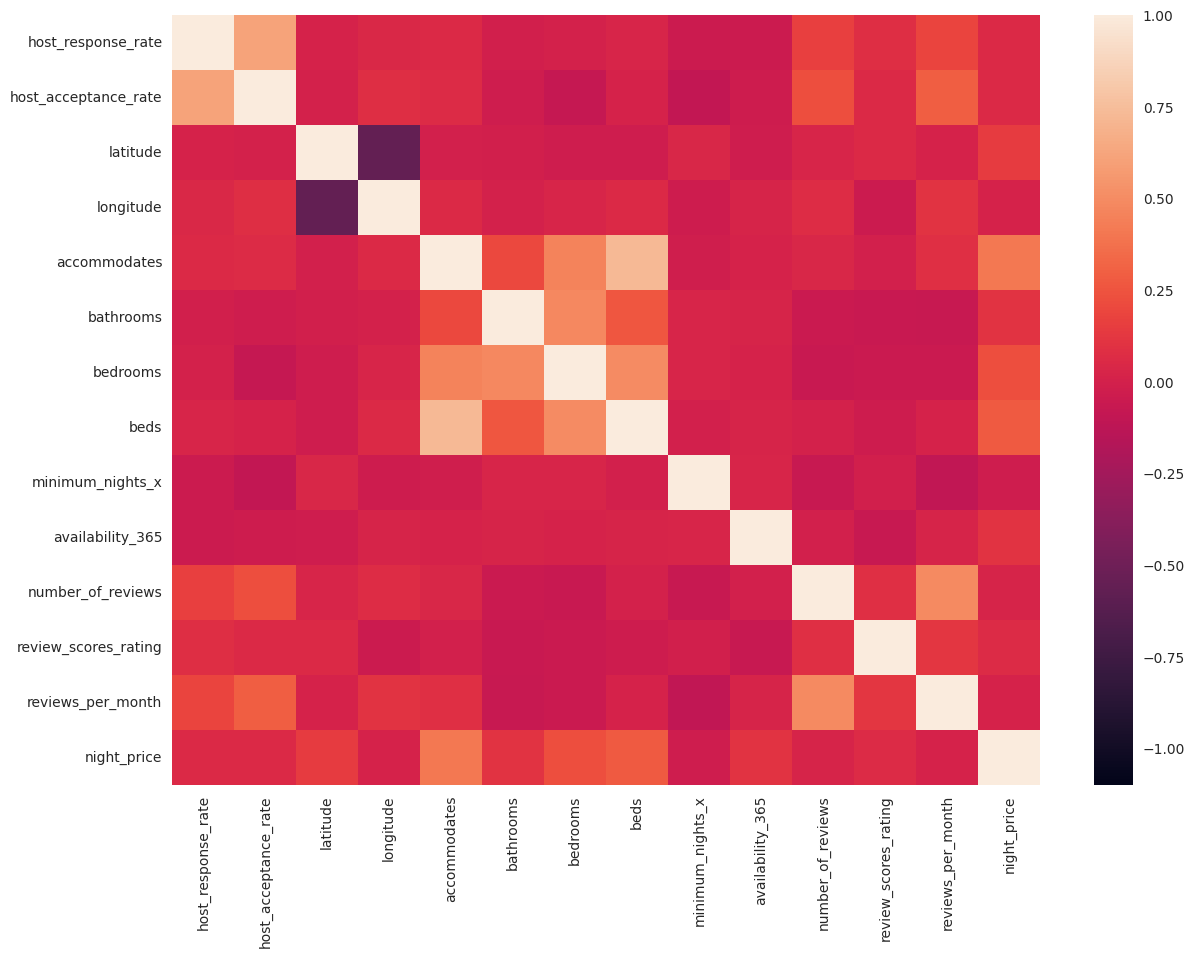

In [7]:
import seaborn as sns

sns.heatmap(corr, vmin=1, vmax=-1)

### Destaque e interprete as correlações mais fortes \(\|r\| ≥ 0\.4\)\.

As correlações >= que 0.4 são:

host_response_rate x host_acceptance_rate (0.6)
latitude x longitude (-0.5)
accommodates x bedrooms (0.4)
accommodates x beds (0.7)
accommodates x night_price (0.4)
bathrooms x bedrooms (0.4)
bedrooms x beds (0.4)
number_of_reviews x reviews_per_month (0.4)

host_response_rate x host_acceptance_rate: Variáveis que são lógicamente correlacionadas, não representam insigts valiosos. Quanto mais um host responde, naturalmente maior seu grau de aceitação.

latitude x longitude: Variáveis que são lógicamente correlacionadas, não representam insigts valiosos. A latitude e longitude dentro de uma mesma cidade, naturalmente irão ser próximas, considerando o range possível dessas variáveis.

accommodates x bedrooms
accommodates x beds
bathrooms x bedrooms
bedrooms x beds: Variáveis que são lógicamente correlacionadas, não representam insigts valiosos. É esperado que quanto maior uma casa, quanto mais pessoas ela acomoda, mais camas, quartos e banheiros ela terá, assim, todas as variáveis ficam correlacionadas.

accommodates x night_price: Esta correlação, que só é possível ser feita retirando os outliers, contém um insight muito valioso. A variável price, que para um sistema de recomendação de preço para o locatário, e para um sistema de identificação de preço muito alto ou muito baixo para o usuário, é a mais importate, tem uma correlação razoável com a quantidade de pessoas que ela acomoda. Quanto mais pessoas uma casa acomoda, maior o valor que se pode cobrar por uma noite, e ainda se manter em um preço interessante no mercado. E torna a corrrelação do accommodates com outras variáveis mais importe, podendo ser definido o quanto uma casa realmente acomoda pelas outras variáveis, e assim definir se o cadastro do acomodates condiz ou não com a realidade.

number_of_reviews x reviews_per_month: Variáveis que são lógicamente correlacionadas, não representam insigts valiosos. Naturalmente uma acomodação com mais reviews por mês, terá mais reviews ao todo. 

### Construa gráficos de dispersão \(scatterplot\) entre variáveis correlacionadas e adicione linhas de tendência\.

                 GRÁFICOS DE DISPERSÃO COM LINHAS DE TENDÊNCIA                  

1️⃣ VERIFICANDO VARIÁVEIS DISPONÍVEIS
--------------------------------------------------

📊 VARIÁVEIS ENCONTRADAS (8 pares):
   1. host_response_rate ↔ host_acceptance_rate (r ≈ 0.6)
   2. latitude ↔ longitude (r ≈ -0.5)
   3. accommodates ↔ bedrooms (r ≈ 0.4)
   4. accommodates ↔ beds (r ≈ 0.7)
   5. accommodates ↔ night_price (r ≈ 0.4)
   6. bathrooms ↔ bedrooms (r ≈ 0.4)
   7. bedrooms ↔ beds (r ≈ 0.4)
   8. number_of_reviews ↔ reviews_per_month (r ≈ 0.4)


2️⃣ CRIANDO GRÁFICOS DE DISPERSÃO
--------------------------------------------------


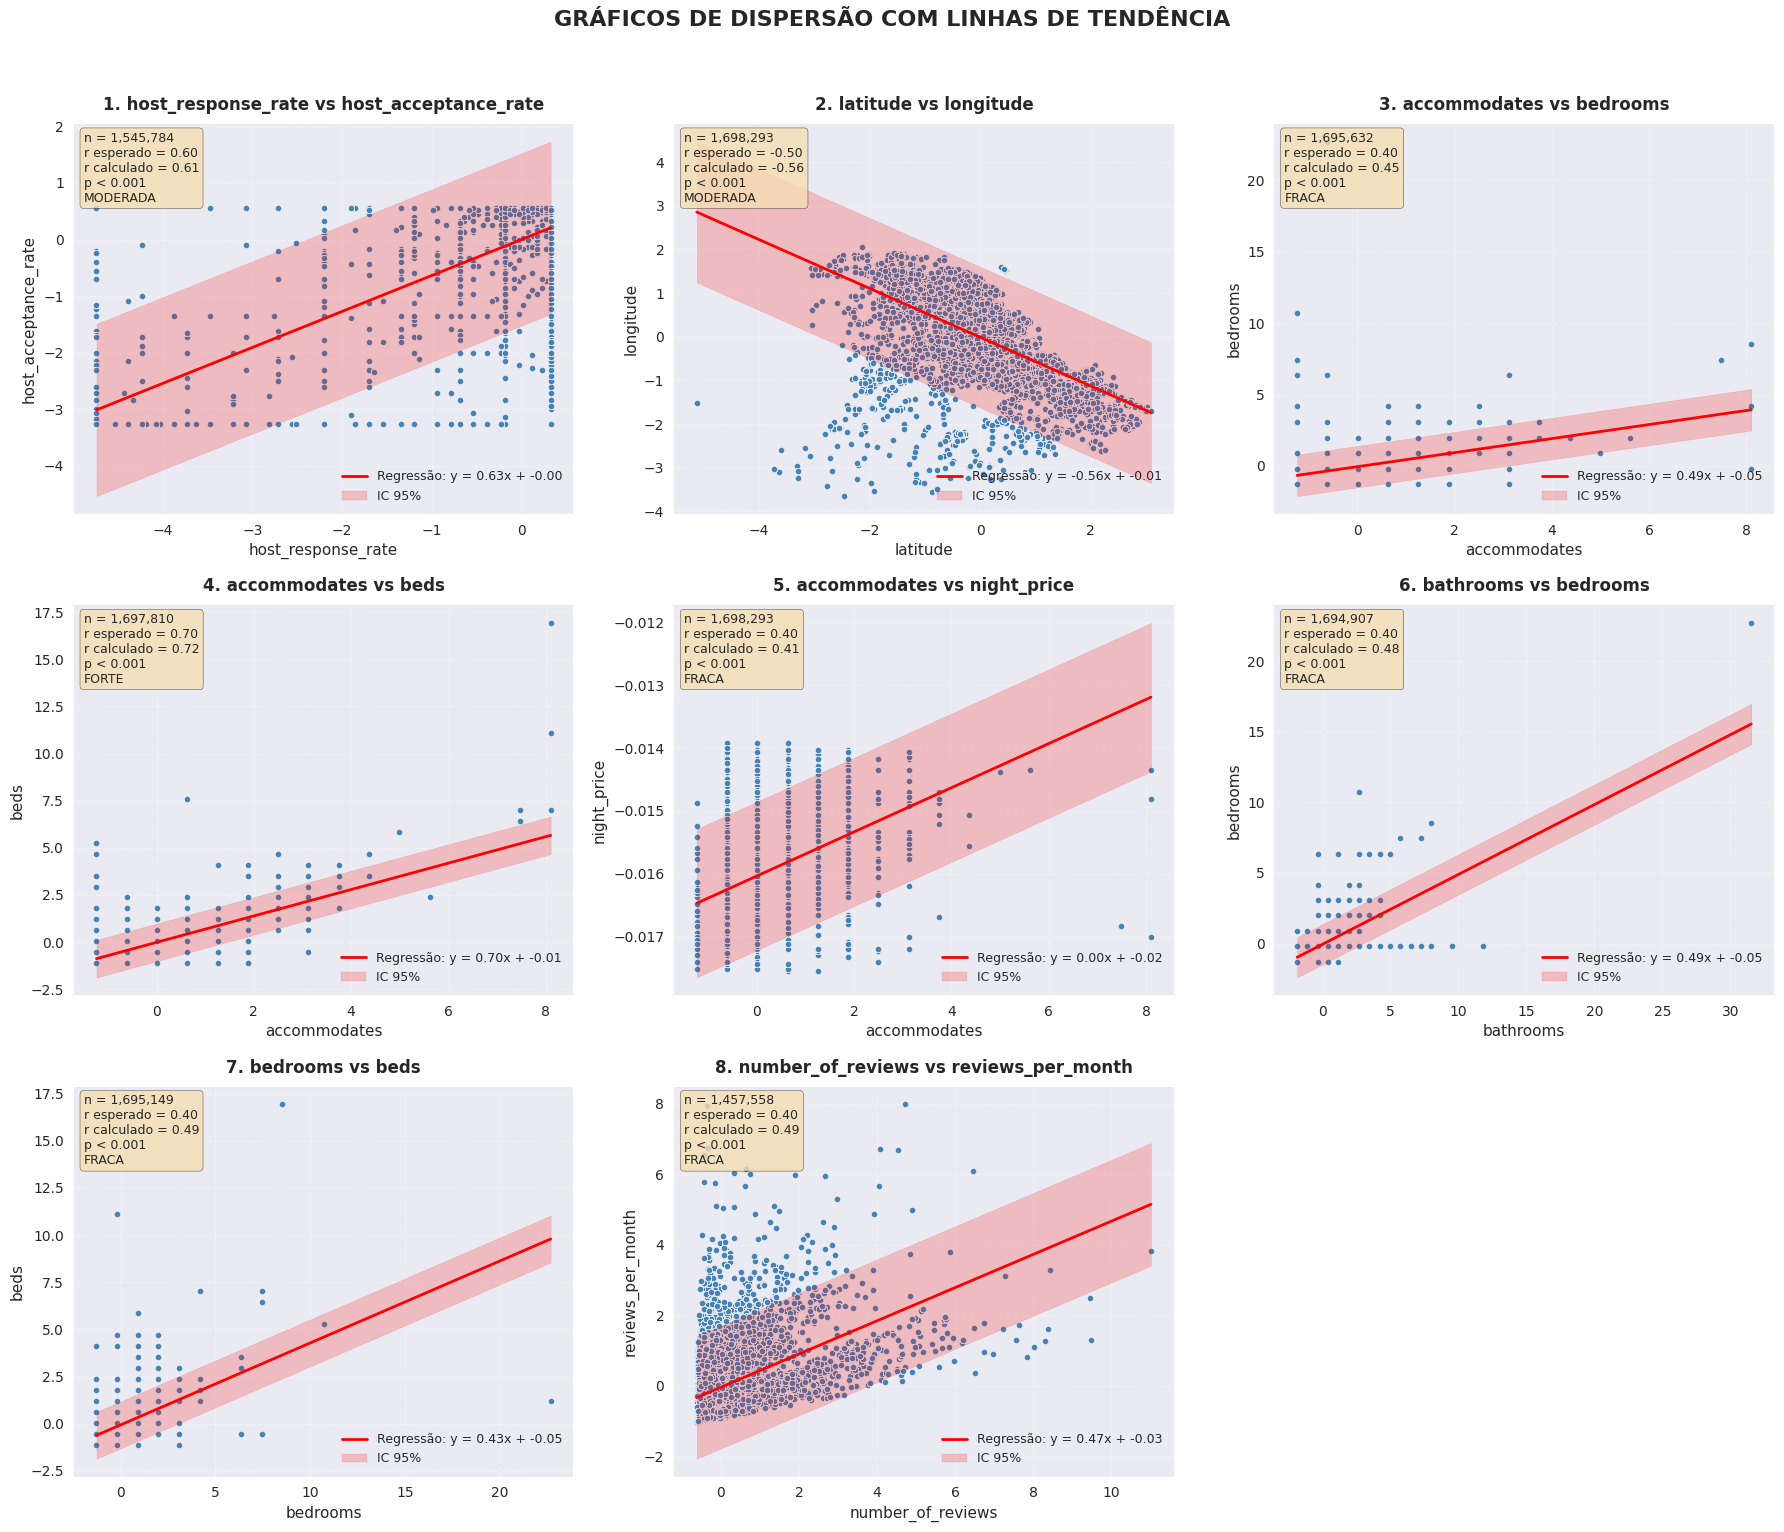

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurações estéticas
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 12

print("="*80)
print("GRÁFICOS DE DISPERSÃO COM LINHAS DE TENDÊNCIA".center(80))
print("="*80)

# ============================================================================
# 1. PREPARAÇÃO DOS DADOS
# ============================================================================

print("\n1️⃣ VERIFICANDO VARIÁVEIS DISPONÍVEIS")
print("-"*50)

# Lista de pares de variáveis para análise
variable_pairs = [
    ('host_response_rate', 'host_acceptance_rate', 0.6),
    ('latitude', 'longitude', -0.5),
    ('accommodates', 'bedrooms', 0.4),
    ('accommodates', 'beds', 0.7),
    ('accommodates', 'night_price', 0.4),
    ('bathrooms', 'bedrooms', 0.4),
    ('bedrooms', 'beds', 0.4),
    ('number_of_reviews', 'reviews_per_month', 0.4)
]

# Verificar quais variáveis existem no DataFrame
available_pairs = []
missing_vars = []

for var1, var2, corr in variable_pairs:
    missing = []
    
    if var1 not in df_filtered.columns:
        missing.append(var1)
    
    if var2 not in df_filtered.columns:
        missing.append(var2)
    
    if not missing:
        available_pairs.append((var1, var2, corr))
    else:
        missing_vars.extend(missing)

print(f"\n📊 VARIÁVEIS ENCONTRADAS ({len(available_pairs)} pares):")
for i, (var1, var2, corr) in enumerate(available_pairs):
    print(f"  {i+1:2d}. {var1} ↔ {var2} (r ≈ {corr})")

if missing_vars:
    print(f"\n⚠️ VARIÁVEIS NÃO ENCONTRADAS:")
    missing_unique = list(set(missing_vars))
    for var in missing_unique:
        print(f"  • {var}")
    
    print(f"\n🔍 TENTANDO ENCONTRAR VARIÁVEIS SIMILARES...")
    # Sugerir variáveis similares
    for var in missing_unique:
        similar_vars = [col for col in df_filtered.columns if var.lower() in col.lower() or col.lower() in var.lower()]
        if similar_vars:
            print(f"  Para '{var}', tente: {', '.join(similar_vars[:3])}")

# ============================================================================
# 2. FUNÇÃO PARA CRIAR GRÁFICOS DE DISPERSÃO
# ============================================================================

def create_scatterplot(df_filtered, x_var, y_var, expected_corr, ax, pair_num, total_pairs):
    """
    Cria um gráfico de dispersão com linha de tendência
    
    Parameters:
    -----------
    df_filtered : DataFrame
    x_var : str - variável no eixo X
    y_var : str - variável no eixo Y
    expected_corr : float - correlação esperada
    ax : matplotlib axis
    pair_num : int - número do par
    total_pairs : int - total de pares
    """
    
    # Remover valores nulos para este par
    data = df_filtered[[x_var, y_var]].dropna()
    
    if len(data) < 2:
        ax.text(0.5, 0.5, f'Dados insuficientes\nn = {len(data)}', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{x_var} vs {y_var}', fontsize=12)
        return
    
    # Calcular correlação real
    actual_corr = data[x_var].corr(data[y_var])
    
    # Criar scatterplot
    scatter = ax.scatter(data[x_var], data[y_var], 
                        alpha=0.6, s=20, c='steelblue', edgecolors='white', linewidth=0.5)
    
    # Adicionar linha de tendência (regressão linear)
    if len(data) > 1:
        # Calcular regressão linear
        slope, intercept, r_value, p_value, std_err = stats.linregress(data[x_var], data[y_var])
        
        # Criar pontos para a linha de regressão
        x_fit = np.linspace(data[x_var].min(), data[x_var].max(), 100)
        y_fit = slope * x_fit + intercept
        
        # Plotar linha de regressão
        ax.plot(x_fit, y_fit, color='red', linewidth=2, label=f'Regressão: y = {slope:.2f}x + {intercept:.2f}')
        
        # Adicionar intervalo de confiança (95%)
        if len(data) > 2:
            from scipy import stats as sp_stats
            # Calcular intervalo de confiança
            n = len(data)
            x_mean = np.mean(data[x_var])
            t_value = sp_stats.t.ppf(0.975, n-2)  # 95% confidence
            
            # Erro padrão da predição
            se = np.sqrt(np.sum((data[y_var] - (slope * data[x_var] + intercept))**2) / (n-2))
            se_pred = se * np.sqrt(1 + 1/n + (x_fit - x_mean)**2 / np.sum((data[x_var] - x_mean)**2))
            
            # Intervalo de confiança
            ci_lower = y_fit - t_value * se_pred
            ci_upper = y_fit + t_value * se_pred
            
            ax.fill_between(x_fit, ci_lower, ci_upper, color='red', alpha=0.2, label='IC 95%')
    
    # Configurar títulos e labels
    ax.set_xlabel(x_var, fontsize=11)
    ax.set_ylabel(y_var, fontsize=11)
    
    title = f'{pair_num}. {x_var} vs {y_var}'
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    
    # Adicionar informações estatísticas
    stats_text = f'n = {len(data):,}\n'
    stats_text += f'r esperado = {expected_corr:.2f}\n'
    stats_text += f'r calculado = {actual_corr:.2f}\n'
    
    if 'actual_corr' in locals() and 'p_value' in locals():
        if p_value < 0.001:
            p_text = 'p < 0.001'
        else:
            p_text = f'p = {p_value:.3f}'
        
        stats_text += f'{p_text}\n'
        
        # Interpretação da correlação
        if abs(actual_corr) >= 0.7:
            strength = 'FORTE'
        elif abs(actual_corr) >= 0.5:
            strength = 'MODERADA'
        elif abs(actual_corr) >= 0.3:
            strength = 'FRACA'
        else:
            strength = 'MUITO FRACA'
        
        stats_text += f'{strength}'
    
    # Posicionar texto estatístico
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Adicionar grade
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Adicionar legenda se houver linha de regressão
    if 'slope' in locals():
        ax.legend(loc='lower right', fontsize=9)

# ============================================================================
# 3. CRIAR GRÁFICOS PARA TODOS OS PARES DISPONÍVEIS
# ============================================================================

print(f"\n\n2️⃣ CRIANDO GRÁFICOS DE DISPERSÃO")
print("-"*50)

if not available_pairs:
    print("❌ Nenhum par de variáveis disponível para análise!")
    print("   Verifique os nomes das colunas no DataFrame.")
else:
    # Determinar layout da grade
    n_pairs = len(available_pairs)
    
    # Calcular grid ótimo
    if n_pairs <= 4:
        n_rows = 2
        n_cols = 2
    elif n_pairs <= 6:
        n_rows = 2
        n_cols = 3
    elif n_pairs <= 9:
        n_rows = 3
        n_cols = 3
    else:
        n_rows = 4
        n_cols = 3
    
    total_cells = n_rows * n_cols
    
    # Criar figura
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
    fig.suptitle('GRÁFICOS DE DISPERSÃO COM LINHAS DE TENDÊNCIA', 
                 fontsize=16, fontweight='bold', y=1.02)
    
    # Ajustar se axes não for array 2D
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    # Criar gráficos para cada par
    for idx, (x_var, y_var, expected_corr) in enumerate(available_pairs):
        if idx < total_cells:
            row = idx // n_cols
            col = idx % n_cols
            
            create_scatterplot(df_filtered, x_var, y_var, expected_corr, 
                              axes[row, col], idx+1, n_pairs)
        else:
            break
    
    # Ocultar eixos vazios
    for idx in range(len(available_pairs), total_cells):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

### Explique, em Markdown, quais variáveis podem ser consideradas dependentes e independentes para futuros modelos preditivos\.

Dependentes:

night_price: Principal variável de interesse econômico. Impacto direto na receita do anfitrião. Altamente variável (CV = 5,699%) bom para modelagem preditiva. Correlações identificadas com várias outras variáveis

number_of_reviews
Justificativa: Indicador de popularidade/sucesso. Boa métrica para satisfação do cliente.
Relacionada com visibilidade na plataforma.

Independentes:

neighbourhood_cleansed: Potencial preditivo alto. Alta variabilidade entre bairros. Fortes diferenças de preço por localização. Segmentação natural do mercado

room_type: Potencial preditivo alto. Diferenças significativas no valor esperado do preço. Segmentação clara do mercado. Forte relação com capacidade e preço

accommodates: Correlação moderada (0.4)

bedrooms: Relação com capacidade

beds: Forte correlação com accommodates (0.7)

bathrooms: Correlação com bedrooms (0.4)

# Pré\-processamento e escalonamento

### Separe as variáveis explicativas \(X\) e a variável alvo \(y = price\)\.

In [4]:
import pandas as pd

df_m = pd.read_csv('merged_buenos_aires_25_2.csv')

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

Q1 = df_m['night_price'].quantile(0.25)
Q3 = df_m['night_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_m[(df_m['night_price'] >= lower_bound) & (df_m['night_price'] <= upper_bound)].copy()

variaveis = ['accommodates', 'neighbourhood_cleansed', 'room_type', 'bedrooms',
'beds', 'bathrooms']

y = df_filtered['night_price']
X = df_filtered[variaveis]

### Utilize train\_test\_split \(70/30, com random\_state fixo\) para criar conjuntos de treino e teste\.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,      
    random_state=42,
    shuffle=True
)

print(f"Dados de Treino: {X_train.shape[0]} amostras")
print(f"Dados de Teste:  {X_test.shape[0]} amostras")

Dados de Treino: 1188805 amostras
Dados de Teste:  509488 amostras


### Aplique a transformação MinMaxScaler e, em seguida, a StandardScaler sobre as variáveis numéricas\.

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np

print("="*80)
print("TRANSFORMAÇÃO DE VARIÁVEIS NUMÉRICAS".center(80))
print("="*80)

# 1. IDENTIFICAR VARIÁVEIS NUMÉRICAS E CATEGÓRICAS
print("\n1️⃣ IDENTIFICANDO TIPOS DE VARIÁVEIS")
print("-"*50)

# Verificar tipos de dados de cada coluna
print("Tipos de dados em X_train:")
print(X_train.dtypes)

# Separar variáveis numéricas e categóricas
numeric_vars = ['accommodates', 'bedrooms', 'beds', 'bathrooms']
categorical_vars = ['neighbourhood_cleansed', 'room_type']

# Separar dados originais
X_train_numeric = X_train[numeric_vars].copy()
X_test_numeric = X_test[numeric_vars].copy()
X_train_categorical = X_train[categorical_vars].copy()
X_test_categorical = X_test[categorical_vars].copy()

print(f"Dados numéricos - Treino: {X_train_numeric.shape}, Teste: {X_test_numeric.shape}")
print(f"Dados categóricos - Treino: {X_train_categorical.shape}, Teste: {X_test_categorical.shape}")

# 3. APLICAR MINMAXSCALER
print("\n📊 APLICANDO MinMaxScaler (normalização para [0, 1]):")
minmax_scaler = MinMaxScaler()

# Ajustar scaler apenas nos dados de treino
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train_numeric)
X_test_minmax_scaled = minmax_scaler.transform(X_test_numeric)

# Converter para DataFrame
X_train_minmax = pd.DataFrame(
    X_train_minmax_scaled,
    columns=[f"{col}_minmax" for col in numeric_vars],
    index=X_train.index
)

X_test_minmax = pd.DataFrame(
    X_test_minmax_scaled,
    columns=[f"{col}_minmax" for col in numeric_vars],
    index=X_test.index
)

print(f"✅ MinMaxScaler aplicado em {len(numeric_vars)} variáveis")
print(f"   Formato: {X_train_minmax.shape}")

# Verificar estatísticas após MinMax
print("\n📈 Estatísticas após MinMaxScaler (treino):")
for i, col in enumerate(numeric_vars):
    min_val = X_train_minmax.iloc[:, i].min()
    max_val = X_train_minmax.iloc[:, i].max()
    mean_val = X_train_minmax.iloc[:, i].mean()
    print(f"  {col}: min={min_val:.3f}, max={max_val:.3f}, mean={mean_val:.3f}")

# 4. APLICAR STANDARDSCALER
print("\n\n📊 APLICANDO StandardScaler (padronização para média=0, std=1):")

# Opção A: Aplicar StandardScaler nas variáveis originais
standard_scaler = StandardScaler()

X_train_standard_scaled = standard_scaler.fit_transform(X_train_numeric)
X_test_standard_scaled = standard_scaler.transform(X_test_numeric)

X_train_standard = pd.DataFrame(
    X_train_standard_scaled,
    columns=[f"{col}_standard" for col in numeric_vars],
    index=X_train.index
)

X_test_standard = pd.DataFrame(
    X_test_standard_scaled,
    columns=[f"{col}_standard" for col in numeric_vars],
    index=X_test.index
)

print(f"✅ StandardScaler aplicado em {len(numeric_vars)} variáveis")
print(f"   Formato: {X_train_standard.shape}")

# Verificar estatísticas após StandardScaler
print("\n📈 Estatísticas após StandardScaler (treino):")
for i, col in enumerate(numeric_vars):
    mean_val = X_train_standard.iloc[:, i].mean()
    std_val = X_train_standard.iloc[:, i].std()
    print(f"  {col}: mean={mean_val:.6f}, std={std_val:.6f}")

# 5. OPÇÃO B: StandardScaler APÓS MinMaxScalER (sequencial)
print("\n\n📊 OPÇÃO B: StandardScaler APÓS MinMaxScaler (em cascata):")

# Usar os dados já normalizados pelo MinMax
standard_scaler_after_minmax = StandardScaler()

X_train_minmax_then_standard = standard_scaler_after_minmax.fit_transform(X_train_minmax_scaled)
X_test_minmax_then_standard = standard_scaler_after_minmax.transform(X_test_minmax_scaled)

X_train_cascata = pd.DataFrame(
    X_train_minmax_then_standard,
    columns=[f"{col}_cascata" for col in numeric_vars],
    index=X_train.index
)

X_test_cascata = pd.DataFrame(
    X_test_minmax_then_standard,
    columns=[f"{col}_cascata" for col in numeric_vars],
    index=X_test.index
)

print(f"✅ Transformação em cascata aplicada")
print(f"   Formato: {X_train_cascata.shape}")

# 6. JUNTAR VARIÁVEIS CATEGÓRICAS
print("\n\n3️⃣ RECONSTRUINDO DATASETS COMPLETOS")
print("-"*50)

# Dataset 1: Apenas MinMaxScaler
X_train_final_minmax = pd.concat([X_train_minmax, X_train_categorical], axis=1)
X_test_final_minmax = pd.concat([X_test_minmax, X_test_categorical], axis=1)

# Dataset 2: Apenas StandardScaler
X_train_final_standard = pd.concat([X_train_standard, X_train_categorical], axis=1)
X_test_final_standard = pd.concat([X_test_standard, X_test_categorical], axis=1)

# Dataset 3: Cascata (MinMax + Standard)
X_train_final_cascata = pd.concat([X_train_cascata, X_train_categorical], axis=1)
X_test_final_cascata = pd.concat([X_test_cascata, X_test_categorical], axis=1)

print("✅ Datasets reconstruídos:")
print(f"  • MinMax only:      {X_train_final_minmax.shape}")
print(f"  • Standard only:    {X_train_final_standard.shape}")
print(f"  • Cascata:          {X_train_final_cascata.shape}")

# 7. RESUMO ESTATÍSTICO DAS TRANSFORMAÇÕES
print("\n\n4️⃣ RESUMO ESTATÍSTICO DAS TRANSFORMAÇÕES")
print("-"*50)

for i, var in enumerate(numeric_vars):
    print(f"\n📊 {var.upper()}:")
    print(f"  Original (treino):")
    print(f"    Média: {X_train_numeric[var].mean():.2f}")
    print(f"    Desvio: {X_train_numeric[var].std():.2f}")
    print(f"    Min: {X_train_numeric[var].min():.2f}")
    print(f"    Max: {X_train_numeric[var].max():.2f}")
    
    print(f"  Após MinMaxScaler:")
    print(f"    Média: {X_train_minmax.iloc[:, i].mean():.4f}")
    print(f"    Desvio: {X_train_minmax.iloc[:, i].std():.4f}")
    print(f"    Min: {X_train_minmax.iloc[:, i].min():.4f}")
    print(f"    Max: {X_train_minmax.iloc[:, i].max():.4f}")
    
    print(f"  Após StandardScaler:")
    print(f"    Média: {X_train_standard.iloc[:, i].mean():.6f}")
    print(f"    Desvio: {X_train_standard.iloc[:, i].std():.6f}")
    print(f"    Min: {X_train_standard.iloc[:, i].min():.4f}")
    print(f"    Max: {X_train_standard.iloc[:, i].max():.4f}")

print("\n" + "="*80)
print("TRANSFORMAÇÕES CONCLUÍDAS COM SUCESSO!".center(80))
print("="*80)

# 8. DATASETS FINAIS DISPONÍVEIS
print("\n🎯 DATASETS DISPONÍVEIS PARA MODELAGEM:")
print("-"*50)

print(f"\n1. X_train_final_minmax   ({X_train_final_minmax.shape})")
print(f"   • Primeiras variáveis: {list(X_train_final_minmax.columns[:3])}")

print(f"\n2. X_test_final_minmax    ({X_test_final_minmax.shape})")

print(f"\n3. X_train_final_standard ({X_train_final_standard.shape})")
print(f"   • Primeiras variáveis: {list(X_train_final_standard.columns[:3])}")

print(f"\n4. X_test_final_standard  ({X_test_final_standard.shape})")

print(f"\n5. X_train_final_cascata  ({X_train_final_cascata.shape})")
print(f"   • Primeiras variáveis: {list(X_train_final_cascata.columns[:3])}")

print(f"\n6. X_test_final_cascata   ({X_test_final_cascata.shape})")

print(f"\n🎯 VARIÁVEL TARGET (y):")
print(f"   • y_train: {y_train.shape}")
print(f"   • y_test:  {y_test.shape}")
print(f"   • Média do preço: R$ {y_train.mean():.2f}")

print("\n" + "="*80)

                      TRANSFORMAÇÃO DE VARIÁVEIS NUMÉRICAS                      

1️⃣ IDENTIFICANDO TIPOS DE VARIÁVEIS
--------------------------------------------------
Tipos de dados em X_train:
accommodates                int64
neighbourhood_cleansed     object
room_type                  object
bedrooms                  float64
beds                      float64
bathrooms                 float64
dtype: object
Dados numéricos - Treino: (1188805, 4), Teste: (509488, 4)
Dados categóricos - Treino: (1188805, 2), Teste: (509488, 2)

📊 APLICANDO MinMaxScaler (normalização para [0, 1]):
✅ MinMaxScaler aplicado em 4 variáveis
   Formato: (1188805, 4)

📈 Estatísticas após MinMaxScaler (treino):
  accommodates: min=0.000, max=1.000, mean=0.120
  bedrooms: min=0.000, max=1.000, mean=0.049
  beds: min=0.000, max=1.000, mean=0.057
  bathrooms: min=0.000, max=1.000, mean=0.053


📊 APLICANDO StandardScaler (padronização para média=0, std=1):
✅ StandardScaler aplicado em 4 variáveis
   Formato: (118

### Mostre estatísticas antes e depois das transformações e valide a reconversão dos valores escalados \(inverse\_transform\)\.

In [38]:
print("\n" + "="*80)
print("🔁 INVERSE_TRANSFORM - CASCATA (Standard → MinMax)".center(80))
print("="*80)

# 1️⃣ Reverter StandardScaler
X_train_after_standard_inverse = standard_scaler_after_minmax.inverse_transform(
    X_train_minmax_then_standard
)

# 2️⃣ Reverter MinMaxScaler
X_train_cascata_inverted = minmax_scaler.inverse_transform(
    X_train_after_standard_inverse
)

X_train_cascata_inverted_df = pd.DataFrame(
    X_train_cascata_inverted,
    columns=numeric_vars,
    index=X_train.index
)

X_train_cascata_compare = X_train_cascata.rename(columns={'accommodates_cascata':'accommodates', 'bedrooms_cascata':'bedrooms', 'beds_cascata':'beds','bathrooms_cascata':'bathrooms'})

# Comparar médias
print("\n📊 Comparação de médias (Original vs Invertido - Cascata):")
for var in numeric_vars:
    original_mean = X_train_numeric[var].mean()
    normalized_mean = X_train_cascata_compare[var].mean()
    inverted_mean = X_train_cascata_inverted_df[var].mean()
    
    print(f"  {var}:")
    print(f"    Média original : {original_mean:.6f}")
    print(f"    Média normalized : {normalized_mean}")
    print(f"    Média invertida: {inverted_mean:.6f}")



               🔁 INVERSE_TRANSFORM - CASCATA (Standard → MinMax)                

📊 Comparação de médias (Original vs Invertido - Cascata):
  accommodates:
    Média original : 2.793827
    Média normalized : 1.4972258302068472e-18
    Média invertida: 2.793827
  bedrooms:
    Média original : 1.077269
    Média normalized : 7.8182418809876e-16
    Média invertida: 1.077269
  beds:
    Média original : 1.773685
    Média normalized : 4.497479013925682e-16
    Média invertida: 1.773685
  bathrooms:
    Média original : 1.156703
    Média normalized : 3.528314392481049e-16
    Média invertida: 1.156703


### Explique a importância do escalonamento e da padronização em modelos preditivos\.

É imprecindivel a padronização de variáveis numéricas, pois muitos algoritmos, como o próprio de regressão linear, outras regressões, algoritmos de deepleaning, entre outros, são evetados por diferenças na escala desses valores, gerando assim um viés. Exemplos concretos são: regressão linear, KNN e redes neurais, todos esses exemplos, só funcionam com precisam quanto a normalização dos dados é aplicada e nenhuma variável tem mais peso que a outra (a menos que seja proposital como no caso de redes neurais).

# Séries temporais e janelamento

### Crie uma série temporal com o preço médio diário \(price\_mean\_day\) a partir do arquivo calendar\.csv\.

In [4]:
import pandas as pd

df_c = pd.read_csv('calendar.csv.gz', compression='gzip', usecols=['listing_id', 'date', 'available', 'price', 'minimum_nights'])

In [5]:
df_c['price'] = pd.to_numeric(df_c['price'].str.replace('$','').str.replace(',','').str.replace('.00','',regex=True).str.replace('.','',regex=False))
df_c['date'] = pd.to_datetime(df_c['date'])
df_c = df_c.sort_values('date')
df_c = df_c.set_index('date')

In [7]:
media_diaria = df_c.groupby(df_c.index)['price'].mean()
media_diaria

date
2025-01-29    202.639806
2025-01-30    287.021409
2025-01-31    283.923441
2025-02-01    283.923441
2025-02-02    283.915799
                 ...    
2026-01-28    283.929857
2026-01-29    309.645636
2026-01-30     56.572289
2026-01-31     22.000000
2026-02-01     22.000000
Name: price, Length: 369, dtype: float64

### Reamostre os dados para médias semanais e mensais, utilizando resample\('W'\) e resample\('M'\)\.

In [10]:
media_semanal = df_c['price'].resample('W').mean()
media_semanal

date
2025-02-02    280.021811
2025-02-09    283.915799
2025-02-16    283.915799
2025-02-23    283.915799
2025-03-02    283.915799
2025-03-09    283.915799
2025-03-16    283.915799
2025-03-23    283.915799
2025-03-30    283.915799
2025-04-06    283.915799
2025-04-13    283.915799
2025-04-20    283.915799
2025-04-27    283.915799
2025-05-04    283.915799
2025-05-11    283.915799
2025-05-18    283.915799
2025-05-25    283.915799
2025-06-01    283.915799
2025-06-08    283.915799
2025-06-15    283.915799
2025-06-22    283.915799
2025-06-29    283.915799
2025-07-06    283.915799
2025-07-13    283.915799
2025-07-20    283.915799
2025-07-27    283.915799
2025-08-03    283.915799
2025-08-10    283.915799
2025-08-17    283.915799
2025-08-24    283.915799
2025-08-31    283.915799
2025-09-07    283.915799
2025-09-14    283.915799
2025-09-21    283.915799
2025-09-28    283.915799
2025-10-05    283.915799
2025-10-12    283.915799
2025-10-19    283.915799
2025-10-26    283.915799
2025-11-02    283.91

In [13]:
media_mensal = df_c['price'].resample('M').mean()
media_mensal

date
2025-01-31    276.521433
2025-02-28    283.916072
2025-03-31    283.915799
2025-04-30    283.915799
2025-05-31    283.915799
2025-06-30    283.915799
2025-07-31    283.915799
2025-08-31    283.915799
2025-09-30    283.915799
2025-10-31    283.915799
2025-11-30    283.915799
2025-12-31    283.915799
2026-01-31    284.492358
2026-02-28     22.000000
Freq: M, Name: price, dtype: float64

### Calcule médias móveis de 7 e 30 dias \(rolling\(\)\) e plote as séries original e suavizadas\.

In [6]:
# Garantir que o índice é datetime
df_c.index = pd.to_datetime(df_c.index)

# Série original
price_daily = df_c['price']

# Médias móveis
mm_7d  = price_daily.rolling(window=7).mean()
mm_30d = price_daily.rolling(window=30).mean()

<AxesSubplot: xlabel='date', ylabel='price'>

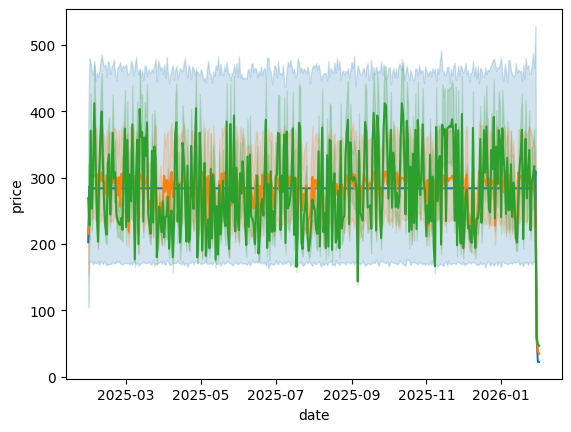

In [22]:
import seaborn as sns

sns.lineplot(price_daily)
sns.lineplot(mm_7d)
sns.lineplot(mm_30d)

### Calcule a variação percentual mês a mês \(pct\_change\(\)\) e identifique períodos atípicos\.

/tmp/ipykernel_65/4019690339.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_c['pct_change'] = df_c['price'].pct_change() * 100


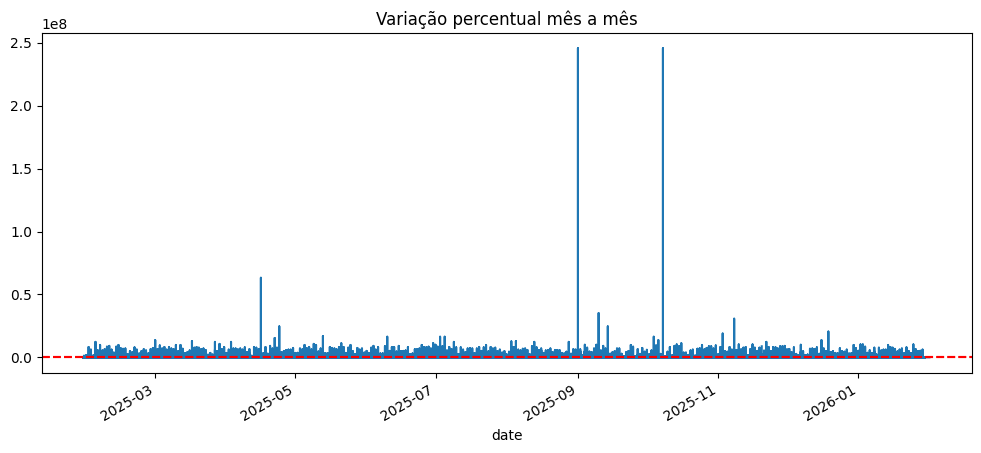

In [23]:
import matplotlib.pyplot as plt

df_c['pct_change'] = df_c['price'].pct_change() * 100
q1 = df_c['pct_change'].quantile(0.25)
q3 = df_c['pct_change'].quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

periodos_atipicos = df_c[
    (df_c['pct_change'] < lim_inf) | 
    (df_c['pct_change'] > lim_sup)
]

df_c['pct_change'].plot(figsize=(12,5))
plt.axhline(lim_sup, color='r', linestyle='--')
plt.axhline(lim_inf, color='r', linestyle='--')
plt.title('Variação percentual mês a mês')
plt.show()


In [24]:
import numpy as np

periodos_atipicos[periodos_atipicos['pct_change'] != np.inf]

,listing_id,available,price,minimum_nights,pct_change
date,,,,,
2025-01-29,1001317963590751712,f,175.0,2.0,372.972973
2025-01-29,1269655911073444603,t,150.0,5.0,1150.000000
2025-01-29,1079673308357033046,f,48.0,4.0,336.363636
2025-01-29,1000569954509848844,f,90.0,1.0,500.000000
2025-01-29,877445338790807269,f,240.0,3.0,860.000000
...,...,...,...,...,...
2026-01-30,427283,t,120.0,3.0,344.444444
2026-01-30,32438347,f,38.0,2.0,1800.000000
2026-01-30,1261110085321004764,f,98.0,2.0,237.931034


### Realize uma previsão simples para o preço médio do próximo mês com base na média móvel de 30 dias\.

In [25]:
df_c['ma_30'] = price_daily.rolling(window=30).mean()
previsao_proximo_mes = df_c['ma_30'].iloc[-1]
print(f'Previsão do preço médio para o próximo mês: {previsao_proximo_mes:.2f}')

Previsão do preço médio para o próximo mês: 46.47


# Modelagem de regressão linear

### Explique, em Markdown, a motivação e o objetivo de aplicar regressão linear no contexto deste dataset\.

Para este dataset, especificamente utilizando todos os dados ou retirando os outliers, é prever variações do preço geral do mercado. Essa informação pode ser utilizada para diversos fins, como para os locadores, antecipar uma adequação ao preço futuro, para os locatários, avaliar o melhor momento para fazer uma viagem, para o airbnb, disponibilizar esta informação para as duas partes se for vantajoso para a empresa, ou aumentar margem de lucro por conta da elevação dos preços. Este ultimo movito para mim é o mais palpável.

### Construa um modelo de regressão linear simples prevendo price a partir de availability\_365\.

In [74]:
import pandas as pd

df_c = pd.read_csv('/work/merged_buenos_aires_25_2.csv')

In [75]:
df_lr = df_c[['night_price', 'availability_365']].dropna()
X = df_lr[['availability_365']]  # precisa ser 2D
y = df_lr['night_price']

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [77]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [78]:
coef = modelo.coef_[0]
intercepto = modelo.intercept_

print(f'Equação do modelo:')
print(f'price = {intercepto:.2f} + {coef:.2f} * availability_365')

Equação do modelo:
price = 1107.03 + -2.83 * availability_365


In [79]:
# é bom deixar claro que essas 2 variáveis que o uninciado pede, não tem correlação

df_c[['night_price','availability_365']].corr()

,night_price,availability_365
night_price,1.000000,-0.012767
availability_365,-0.012767,1.000000


In [80]:
novos_valores_simulados = pd.DataFrame({
    'availability_365': [30, 180, 365]
})

precos_previstos = modelo.predict(novos_valores_simulados)
precos_previstos

array([1022.24394123,  598.30686572,   75.45113925])

### Construa um modelo de regressão linear múltipla incluindo variáveis como accommodates, number\_of\_reviews, room\_type e availability\_365\.

In [83]:
df_lr = df_c[
    ['night_price', 'accommodates', 'number_of_reviews', 'room_type', 'availability_365']
].dropna()

X_multi = df_lr.drop('night_price', axis=1)
y_multi = df_lr['night_price']

X_multi = pd.get_dummies(X_multi, columns=['room_type'], drop_first=True)

from sklearn.model_selection import train_test_split

X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression

modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_multi_train, y_multi_train)

coeficientes = pd.Series(
    modelo_multiplo.coef_,
    index=X_multi_train.columns
).sort_values()

print('Intercepto:', modelo_multiplo.intercept_)
print(coeficientes)

Intercepto: 882.1782030283653
room_type_Hotel room     -422.507221
room_type_Shared room    -270.083834
room_type_Private room   -103.460601
availability_365           -2.851533
number_of_reviews           1.841614
accommodates               62.952076
dtype: float64


In [93]:
X_multi.columns

Index(['accommodates', 'number_of_reviews', 'availability_365',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [96]:
novo = pd.DataFrame({
    'accommodates': [4],
    'number_of_reviews': [25],
    'availability_365': [180],
    'room_type_Hotel room': [1],
    'room_type_Private room': [0],
    'room_type_Shared room': [0],
})

price_previsto = modelo_multiplo.predict(novo)
print(price_previsto[0])

244.24375981694948


### Avalie os modelos utilizando métricas de desempenho \(R², RMSE\) e análise de resíduos\.

In [87]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred_simples = modelo.predict(X_test)

r2_simples = r2_score(y_test, y_pred_simples)
rmse_simples = np.sqrt(mean_squared_error(y_test, y_pred_simples))

print(f'Modelo Simples → R²: {r2_simples:.3f} | RMSE: {rmse_simples:.2f}')

Modelo Simples → R²: 0.000 | RMSE: 32596.66


In [90]:
y_pred_multiplo = modelo_multiplo.predict(X_multi_test)

r2_multiplo = r2_score(y_multi_test, y_pred_multiplo)
rmse_multiplo = np.sqrt(mean_squared_error(y_multi_test, y_pred_multiplo))

print(f'Modelo Múltiplo → R²: {r2_multiplo:.3f} | RMSE: {rmse_multiplo:.2f}')

Modelo Múltiplo → R²: 0.000 | RMSE: 32596.10


In [102]:
residuos_simples = y_test - y_pred_simples
residuos_multiplo = y_test - y_pred_multiplo

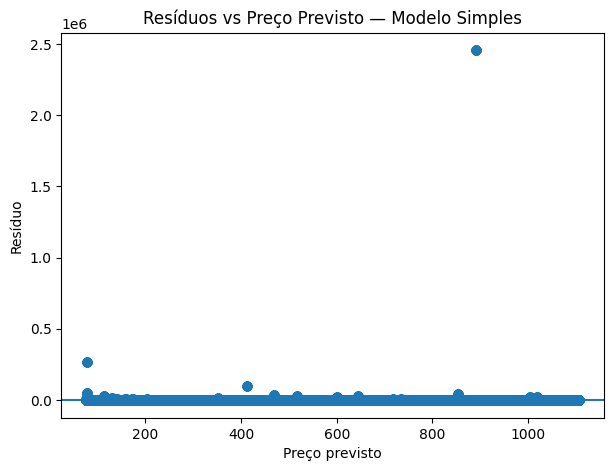

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_pred_simples, residuos_simples)
plt.axhline(0)
plt.xlabel('Preço previsto')
plt.ylabel('Resíduo')
plt.title('Resíduos vs Preço Previsto — Modelo Simples')
plt.show()

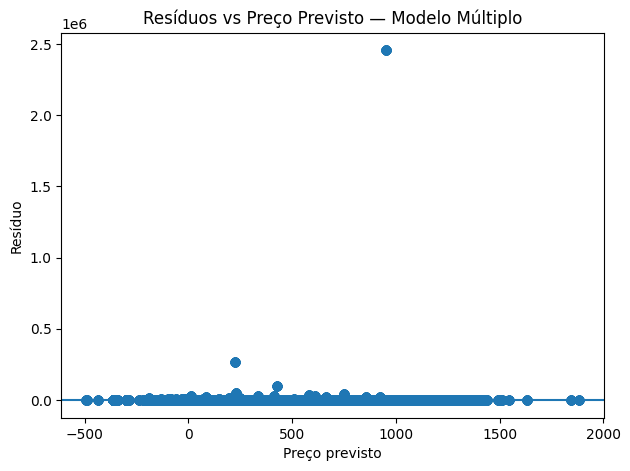

In [122]:
plt.figure(figsize=(7,5))
plt.scatter(y_pred_multiplo, residuos_multiplo)
plt.axhline(0)
plt.xlabel('Preço previsto')
plt.ylabel('Resíduo')
plt.title('Resíduos vs Preço Previsto — Modelo Múltiplo')
plt.show()

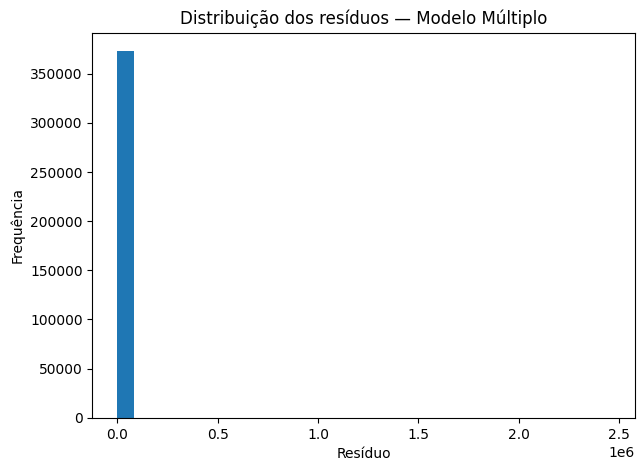

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.hist(residuos_multiplo, bins=30)
plt.title('Distribuição dos resíduos — Modelo Múltiplo')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.show()

### Aplique uma transformação logarítmica na variável price e refaça a regressão múltipla, comparando resultados\.

In [131]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df_lr = df_c[
    ['night_price', 'accommodates', 'number_of_reviews', 'room_type', 'availability_365']
].dropna()

df_lr = df_lr[df_lr['night_price'] > 0]

df_lr['log_night_price'] = np.log(df_lr['night_price'])

X = df_lr.drop(['night_price', 'log_night_price'], axis=1)
y_log = df_lr['log_night_price']

X = pd.get_dummies(X, columns=['room_type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

modelo_log = LinearRegression()
modelo_log.fit(X_train, y_train)

y_pred_log = modelo_log.predict(X_test)

r2_log = r2_score(y_test, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))

print(f'Modelo Log-night_price → R²: {r2_log:.3f} | RMSE (log): {rmse_log:.3f}')

coeficientes = pd.Series(
    modelo_log.coef_,
    index=X_train.columns
).sort_values()

print('Intercepto (log):', modelo_log.intercept_)
print(coeficientes)

Modelo Log-night_price → R²: 0.149 | RMSE (log): 0.748
Intercepto (log): 3.21506019472341
room_type_Shared room    -0.913037
room_type_Hotel room     -0.722219
room_type_Private room   -0.341154
number_of_reviews        -0.000488
availability_365          0.000516
accommodates              0.170443
dtype: float64


Modelo Log-night_price → R²: 0.149 | RMSE (log): 0.748
Modelo Múltiplo → R²: 0.000 | RMSE: 32596.10

Modelo: Linear (price), R²: baixo / instável, RMSE: muito alto
Modelo: Linear (log-price), R²: mais alto, RMSE: bem menor

### Interprete os coeficientes e discuta quais variáveis exercem maior influência sobre o preço das hospedagens\.

Os resultados indicam que o tipo de acomodação exerce a maior influência sobre o preço, com quartos compartilhados e privados apresentando reduções significativas em relação a imóveis inteiros. Entre as variáveis contínuas, a capacidade de hospedagem é o fator mais relevante, com aumentos percentuais expressivos a cada hóspede adicional. Em contrapartida, disponibilidade anual e número de avaliações apresentam efeitos marginais, sugerindo que atuam mais como variáveis de ajuste do que como determinantes centrais do preço.

# Síntese e comunicação dos resultados

### Elabore uma síntese técnica em Markdown com os principais achados do estudo\.

para este dataset, podemos concluir algumas questões interessantes:

A coluna "buy_price", "price" de listings, não parece ser muito realista como valor de compra ou valor de aluguel, apresentando valores muito baixos pra um e muito altos para outro. Foi assim, possível concluir, que ou a coluna representa um aspecto desconhecido do imóvel, ou apresenta valores muito inconsistêntes, sendo assim descartada das análises. Para a questão da validade desses valores: Pesquisando na internet, https://www.quintoandar.com.br/guias/dados-indices/mercado-residencial-america-latina/ o preço médio do m2 em buenos aires é de 13k, um apartamento de 50m2 seria de 647k, em dólares 119k, ainda muito maior que a média.

A coluna "night_price", possui uma variância de (794.8 milhões) uma variabilidade extrema, com outliers muito altos. E com a análise dos quartis, descobrimos que a maioria dos preços é acessível: 75% das diárias custam menos de 59. Sendo assim. para ser possível fazer análises mais representativas, tivemos que retirar os outliers, para análises com "night_prive", "price" de calendars.

Para "number_of_reviews" o valor mais comum é zero, com média 29.41 e mediana 12.0, indicando uma alta concentração de avaliações em poucos imóveis. Uma distibuição de pareto.

Sobre os outliers de night_price e number_of_reviews: Os outliers nas duas variáveis, mas principalmente night price, influenciam de forma extrema na média, de 494 para 41, e impactam, mas não tanto na mediana, 40 para 38. Análises, visualizações, que visam representar a maioria dos dados dessas variáveis, devem ser feitas sem esses outliers, com certeza.

Sobre as distribuições: O bairro com mais propriedades é Pallermo, e o tipo mais comum de imóvel é o 1 'Entire home/apt'.

Sobre as correlações entre as variáveis, as mais interessantes que encontramos foram:
accommodates x night_price: Esta correlação, que só é possível ser feita retirando os outliers, contém um insight muito valioso. A variável price, que para um sistema de recomendação de preço para o locatário, e para um sistema de identificação de preço muito alto ou muito baixo para o usuário, é a mais importate, tem uma correlação razoável com a quantidade de pessoas que ela acomoda. Quanto mais pessoas uma casa acomoda, maior o valor que se pode cobrar por uma noite, e ainda se manter em um preço interessante no mercado. E torna a corrrelação do accommodates com outras variáveis mais importe, podendo ser definido o quanto uma casa realmente acomoda pelas outras variáveis, e assim definir se o cadastro do acomodates condiz ou não com a realidade.

E por consequência, são muito valiosas as correlações:
accommodates x bedrooms
accommodates x beds
bathrooms x bedrooms
bedrooms x beds

### Explique como as análises temporais e regressões podem apoiar decisões de precificação e ocupação no mercado de locações temporárias\.

As análises tempoorais servem para identificar variações sazonais e outros padrões ao longo do tempo.
Os modelos de regressão identificam as lógicas que determinam os valores, correlacionando-os entre si. Essas técnicas em conjunto premitem a previsão dos valores objetivo, como o preço futuro da locações, apoiando decisões mais eficientes, ajustes dinâmicos, baseando-se em evidências.

### Apresente uma conclusão final destacando a relevância das técnicas utilizadas e possíveis extensões futuras \(ex\.: modelos de regressão não linear\)\.

Neste trabalho, foi possível aplicar e expor o uso de análises temporais, modelos de regressão, identificação de correlação entre variáveis, avaliação de modelos, utilização de janelas deslizantes e visualizações de forma geral. Utilizando esses conceitos para analisar dados para apoiar tomadas de decisão (neste caso no mercado de airbnbs de buenos aires).

A aplicação da transformação logarítmica também se mostrou importante, reduzindo a influência de outliers, sem precisar removê-los. 

Como extensões futuras, existem várias possibilidades. A inclusão de variáveis de localização (latitude, longitude ou bairro), indicadores de demanda axiliariam o poder explicativo dos modelos. Além disso, o uso de modelos de regressão não linear, como árvores de decisão, Random Forest, Gradient Boosting ou XGBoost, pode capturar relações complexas e interações entre variáveis que não são bem representadas por modelos lineares.

Em síntese, as técnicas empregadas constituem um baseline robusto e interpretável, adequado tanto para análises exploratórias quanto para suporte inicial à decisão. A evolução para modelos mais avançados representa um caminho natural para aumentar a precisão preditiva e aprofundar a compreensão dos mecanismos de formação de preços no mercado de locações temporárias.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1eae706a-5660-4233-95ad-a0c488dbb3ff' target="_blank">

Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>